<h1><center> Programing Assignment 2</center></h1>

## 1.	Anuran Calls (MFCCs) Dataset was used in anuran species recognition through their calls: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29.  Please find the dataset as “Frogs_MFCCs.csv”. The column “Species” is the true label of the samples, while other columns contain features. (50%)

### a.	Suppose we do not know the “Species” of the data samples (drop them), please design a K-means clustering model to predict the categories of the samples. Please present how would you determine the number of clusters. (10%)

In [1]:
# Reference
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [2]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [3]:
# Read data
mfcc_data = pd.read_csv("Frogs_MFCCs.csv", index_col = False)
print(mfcc_data)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7163       1.0 -0.528595 -0.208051  0.103669  0.086537  0.408476  0.069610   
7164       1.0 -0.442139 -0.328404  0.031452  0.056017  0.424856  0.073288   
7165       1.0 -0.616029 -0.302357  0.063417  0.095671  0.439930  0.069414   
7166       1.0 -0.547168 -0.266780  0.056115  0.048947  0.423631  0.081924   
7167       1.0 -0.520958 -0.258779 -0.070416 -0.025129  0.447967  0.180033   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_14  MFCCs_15  MF

In [4]:
# Check the count of missing data per column
print("Count of missing values:\n", mfcc_data.isnull().sum())

# Check the proportion of missing data per column
print("\nProportion of missing values:\n", mfcc_data.isnull().sum()/len(mfcc_data))

Count of missing values:
 MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Species     0
dtype: int64

Proportion of missing values:
 MFCCs_ 1    0.0
MFCCs_ 2    0.0
MFCCs_ 3    0.0
MFCCs_ 4    0.0
MFCCs_ 5    0.0
MFCCs_ 6    0.0
MFCCs_ 7    0.0
MFCCs_ 8    0.0
MFCCs_ 9    0.0
MFCCs_10    0.0
MFCCs_11    0.0
MFCCs_12    0.0
MFCCs_13    0.0
MFCCs_14    0.0
MFCCs_15    0.0
MFCCs_16    0.0
MFCCs_17    0.0
MFCCs_18    0.0
MFCCs_19    0.0
MFCCs_20    0.0
MFCCs_21    0.0
MFCCs_22    0.0
Species     0.0
dtype: float64


In [5]:
# Check the features' descriptive statistics
mfcc_data.drop(columns = ["Species"]).describe() # Drop the label column

MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  7168.000000  7168.000000  7168.000000  7168.000000  7168.000000   
mean      0.989911     0.324552     0.311798     0.446680     0.127763   
std       0.068934     0.216563     0.262990     0.159693     0.162147   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.539779   
25%       1.000000     0.166144     0.138562     0.337570     0.053846   
50%       1.000000     0.301846     0.274419     0.481873     0.161840   
75%       1.000000     0.466837     0.430846     0.560131     0.222853   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  7168.000000  7168.000000  7168.000000  7168.000000  7168.000000  ...   
mean      0.097485    -0.002251    -0.000257     0.128947     0.055939  ...   
std       0.119936     0.170355     0.116349     0.178604     0.127277  ...   
min      -0.410417    -0.538982    -0.576506    -0.513460    -0.952266  ...   
25%       0.012383    -0.125913    -0.062739     0.006984    -0.001427  ...   
50%       0.072017    -0.053234     0.013305     0.190032     0.063370  ...   
75%       0.175654     0.084703     0.075525     0.265539     0.117799  ...   
max       0.964240     0.696887     0.551762     0.738033     0.522768  ...   

          MFCCs_13     MFCCs_14     MFCCs_15     MFCCs_16     MFCCs_17  \
count  7168.000000  7168.000000  7168.000000  7168.000000  7168.000000   
mean      0.151562    -0.039641    -0.102209     0.042376     0.088950   
std       0.206766     0.152377     0.187792     0.119979     0.138210   
min      -0.644116    -0.590380    -0.717156    -0.498675    -0.421480   
25%      -0.001688    -0.133214    -0.256261    -0.018853    -0.000944   
50%       0.198160    -0.051026    -0.144508     0.041357     0.113120   
75%       0.324709     0.037802     0.014805     0.107466     0.202197   
max       0.945710     0.566873     0.668924     0.670700     0.681157   

          MFCCs_18     MFCCs_19     MFCCs_20     MFCCs_21     MFCCs_22  
count  7168.000000  7168.000000  7168.000000  7168.000000  7168.000000  
mean      0.007616    -0.049732    -0.053598     0.037406     0.088014  
std       0.084770     0.082572     0.094126     0.079552     0.123423  
min      -0.759322    -0.680745    -0.361649    -0.430812    -0.379304  
25%      -0.042374    -0.106255    -0.121254    -0.017606     0.000902  
50%       0.011697    -0.053152    -0.055588     0.031552     0.106531  
75%       0.061707     0.005993     0.000604     0.089761     0.195041  
max       0.614064     0.574209     0.467831     0.389797     0.432207  

[8 rows x 22 columns]

In [6]:
# Extract features without labels
X = mfcc_data.drop(columns = ["Species"]) 
X.shape

(7168, 22)

In [7]:
# Perform data scaling
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[1.        , 0.49369345, 0.23010816, ..., 0.50553727, 0.66961514,
        0.48470407],
       [1.        , 0.50480982, 0.23471194, ..., 0.46027513, 0.62523692,
        0.50320942],
       [1.        , 0.49332334, 0.24585523, ..., 0.40575516, 0.64576487,
        0.56248974],
       ...,
       [1.        , 0.0340677 , 0.09308371, ..., 0.4867547 , 0.48160419,
        0.3474526 ],
       [1.        , 0.07522731, 0.11785839, ..., 0.4597409 , 0.44972466,
        0.37048925],
       [1.        , 0.0908934 , 0.12342952, ..., 0.4814574 , 0.58313904,
        0.46917447]])

In [8]:
# Perform clustering with an arbitrary cluster number
n_cluster = 3
kmean = KMeans(n_cluster, random_state = 1) # Set random state for reproducible results
kmean.fit(X_scaled)

# Output cluster labels of the data points (first 200 samples)
print(kmean.labels_[:200])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


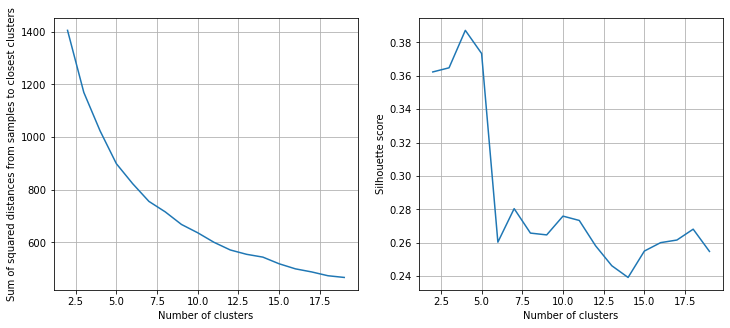

In [9]:
# Perform clustering with the optimal cluster number
K = 20
squared_distance = [] 
silhouette_score = []
for i in range(2, K): 
    kmean = KMeans(i, random_state = 1)
    kmean.fit(X_scaled)
    squared_distance.append(kmean.inertia_)
    silhouette_score.append(metrics.silhouette_score(X_scaled, 
                                                     kmean.labels_, 
                                                     metric = "euclidean"))
    
# Plot the sum of squared distances and silhouette score to measure clustering quality
fig, axs = plt.subplots(1, 2, figsize = (12, 5)) 
axs[0].plot(range(2, K), squared_distance) 
axs[1].plot(range(2, K), silhouette_score)
axs[0].grid(True) # Turn the axes grids on
axs[0].set_ylabel("Sum of squared distances from samples to closest clusters") 
axs[0].set_xlabel("Number of clusters")
axs[1].grid(True) # Turn the axes grids on 
axs[1].set_ylabel("Silhouette score") 
axs[1].set_xlabel("Number of clusters")
plt.show()

In [10]:
# Considering the sum of squared distances and Silhouette score, we determine the cluster number as 5
# Produce cluster labels
labels_km = KMeans(5, random_state = 1).fit(X_scaled).labels_
labels_km

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

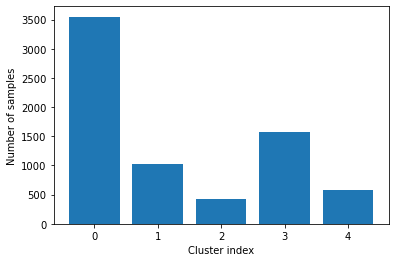

In [11]:
# Evaluate clusters
# Visualize cluster size distribution
unique_labels, lanel_cnts = np.unique(labels_km, return_counts = True) 
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("Number of samples")
plt.show()

In [12]:
tsne = TSNE(n_components = 2,
            init = "random", # Random initialization
            random_state = 1)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne

array([[50.450382 , 39.95928  ],
       [50.938015 , 40.98772  ],
       [52.46692  , 40.913815 ],
       ...,
       [18.91017  , -2.4931674],
       [18.913206 , -2.4861546],
       [18.847164 , -2.5904188]], dtype=float32)

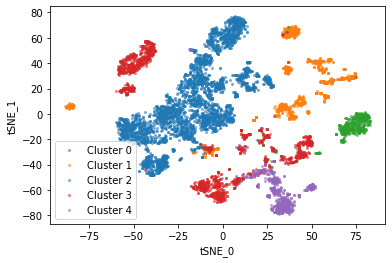

In [13]:
# Visualize the clusters in 2D t-SNE space
for l in unique_labels: # l is "labels"--"l"
    plt.scatter(X_tsne[labels_km == l, 0],
                X_tsne[labels_km == l, 1], 
                s = 4, # Marker size
                alpha = 0.5, # Transparency 
                label = "Cluster %s" % l) # Label
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")
plt.legend() # Show legend 
plt.show()

/Users/anniliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


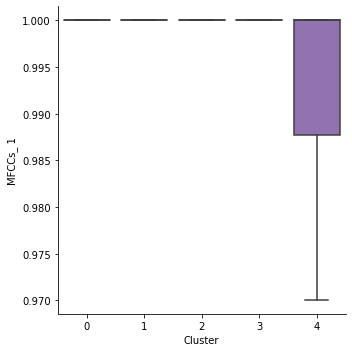

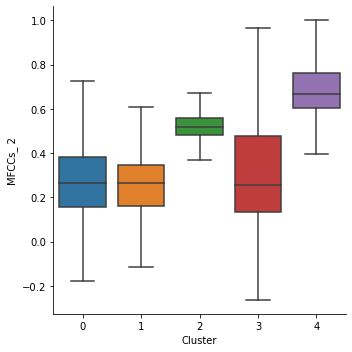

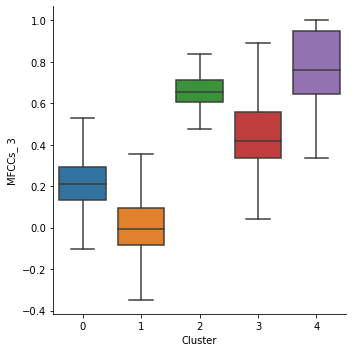

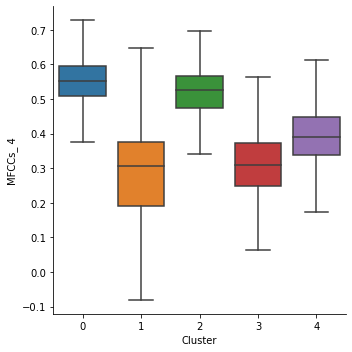

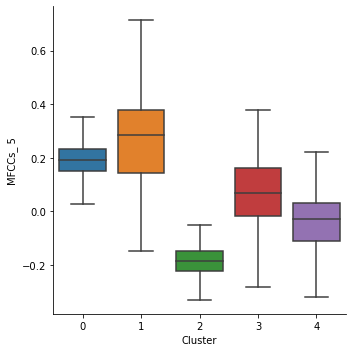

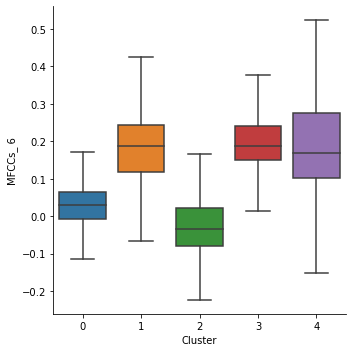

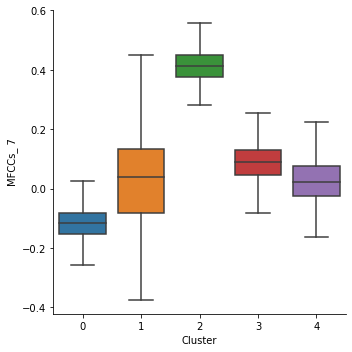

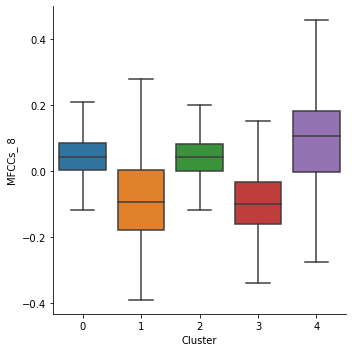

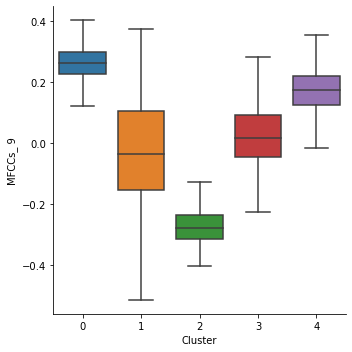

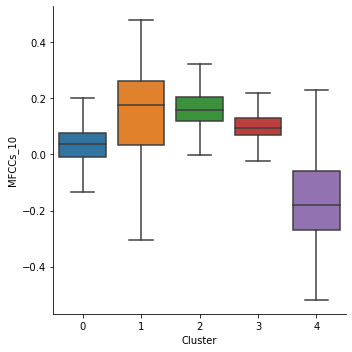

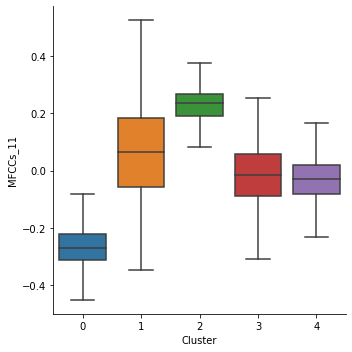

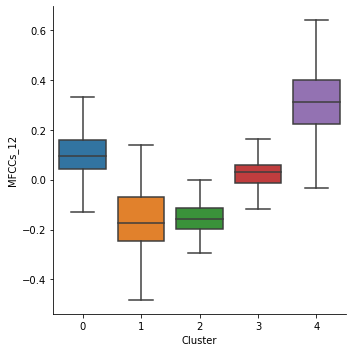

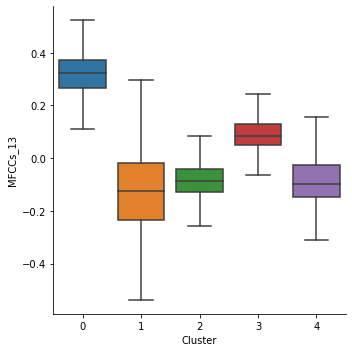

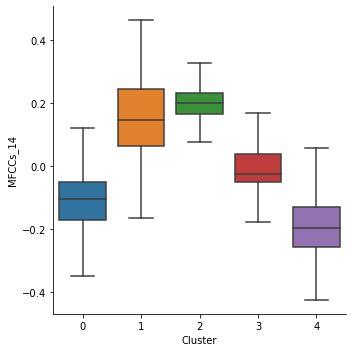

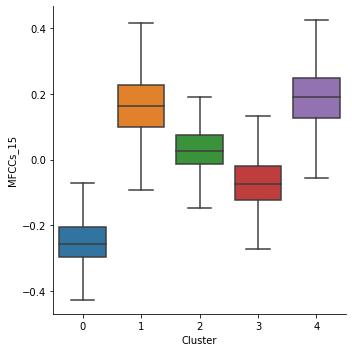

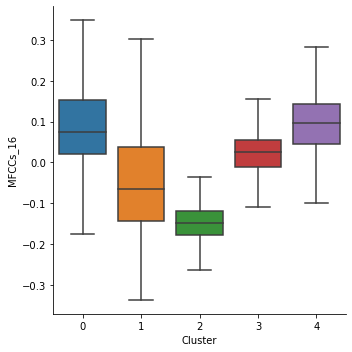

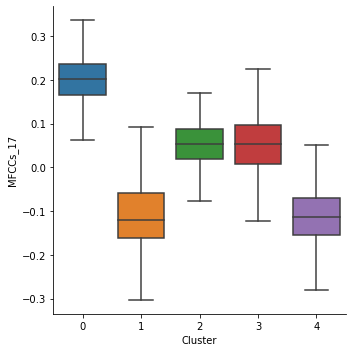

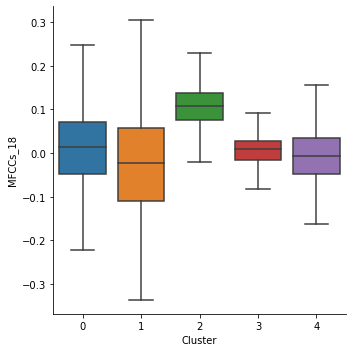

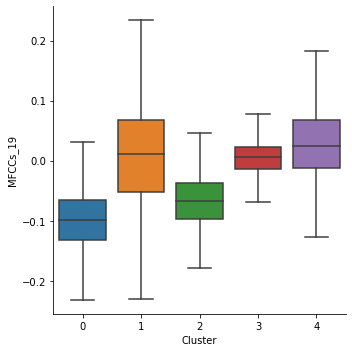

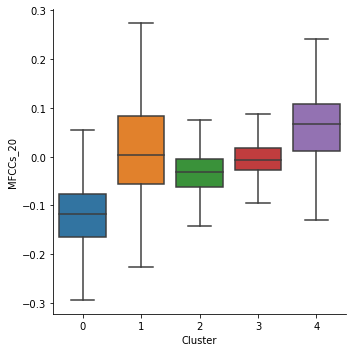

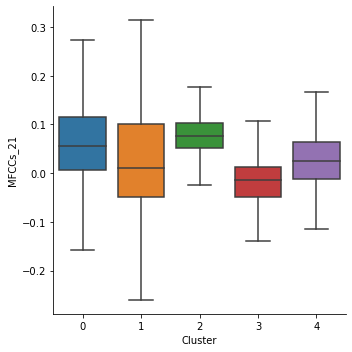

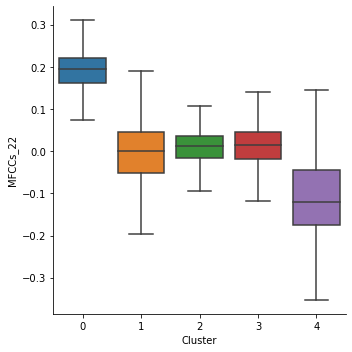

In [14]:
# Use boxplot to visualize characteristics of the identified clusters in terms of each feature
# Get feature list
mfcc_data["Cluster"]  = labels_km # Create one column "Cluster"
feature_list = mfcc_data.drop(columns = ["Species", "Cluster"]).columns.tolist()

for var in feature_list:
    sns.catplot(x = "Cluster",
                y = var, 
                kind = "box", 
                showfliers = False, # "showfliers" is used for the outliers
                data = mfcc_data) 

### b.	Please design a hierarchical clustering model to predict the categories of the samples. Please plot the dendrogram. (10%)

In [15]:
# Import packages
from sklearn.metrics.pairwise import euclidean_distances 
import scipy.cluster.hierarchy as shc
import scipy.spatial as sp

In [16]:
# Calculate Euclidean distance matrix of the data, 
# where each element denotes the pairwise Euclidean distance between two data points
dis_mat = euclidean_distances(X_scaled)

# Check the dimension of dis_mat
dis_mat.shape

(7168, 7168)

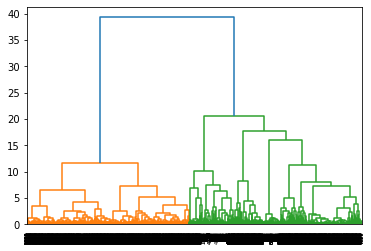

In [17]:
# Plot the dendrogram to determine the optimal cluster number
linkage = shc.linkage(sp.distance.squareform(dis_mat, checks = False), # Do not check the distance matrix
                      method = "ward")
den_plt = shc.dendrogram(linkage, orientation = "top") 
plt.show()

In [18]:
# According to the dendrogram, we determine the cluster number as 2, 
# because we find a horizontal rectangle with max-height [21 - 39] 
# that does not cross any horizontal vertical dendrogram line
labels_hc = shc.fcluster(Z = linkage, # Input linkage, "Z" not "z"
                         t = 2, # Cluster number 
                         criterion = "maxclust")
labels_hc

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

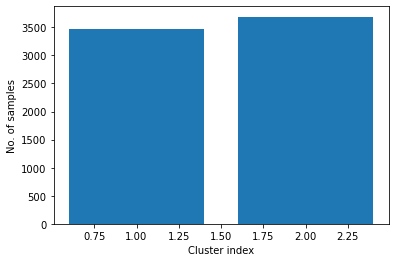

In [19]:
# Visualize cluster size distribution
unique_labels, lanel_cnts = np.unique(labels_hc, return_counts = True) 
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")
plt.show()

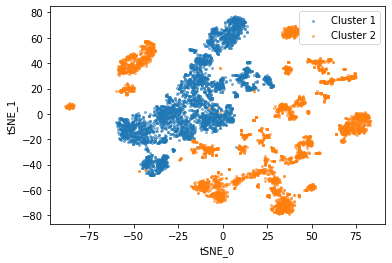

In [20]:
# Visualize the clusters in 2D t-SNE space 
for l in unique_labels: # l is "labels"--"l"
    plt.scatter(X_tsne[labels_hc == l, 0], X_tsne[labels_hc == l, 1], # labels_hc 
                s = 4, # Marker size
                alpha = 0.5, # Transparency 
                label = "Cluster %s" % l) # Label
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")
plt.legend() # Show legend 
plt.show()

/Users/anniliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


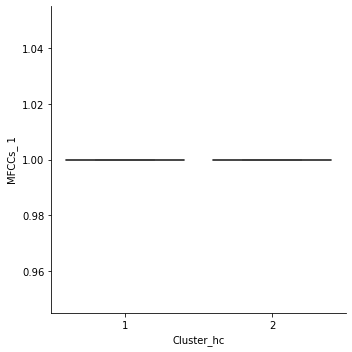

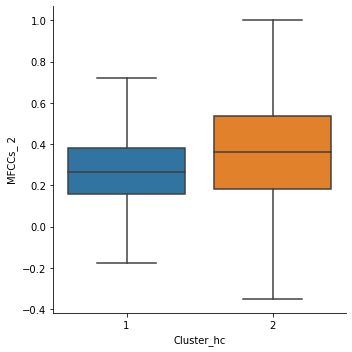

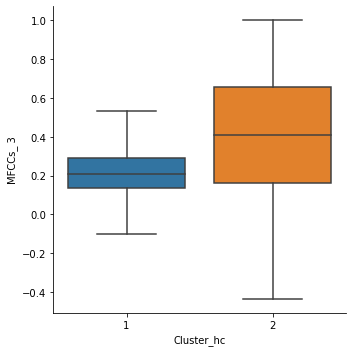

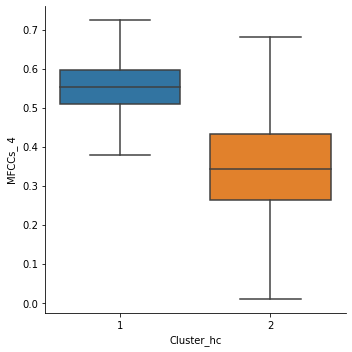

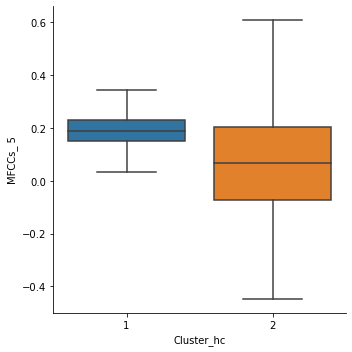

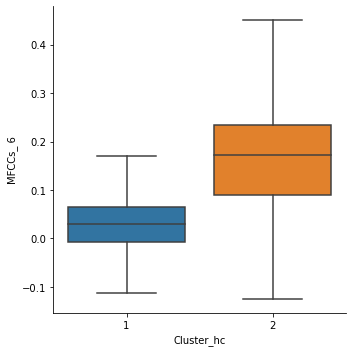

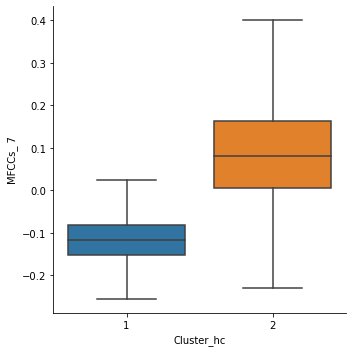

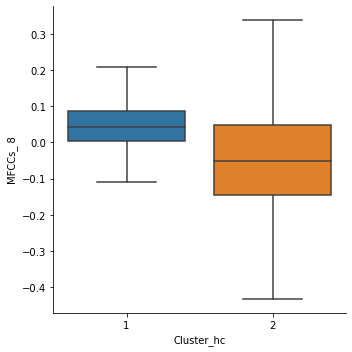

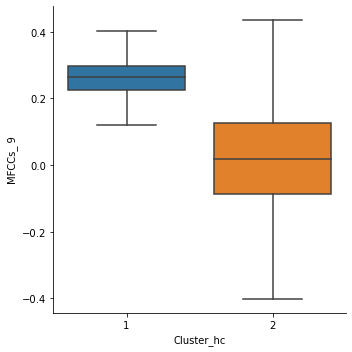

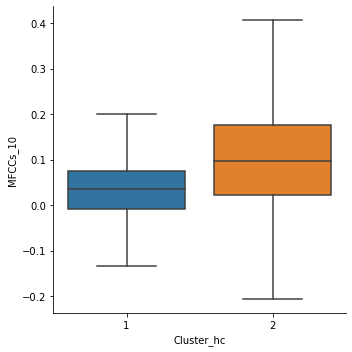

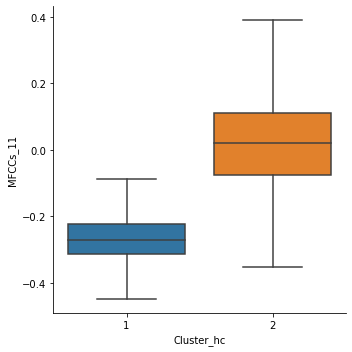

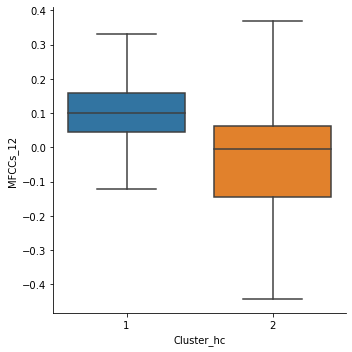

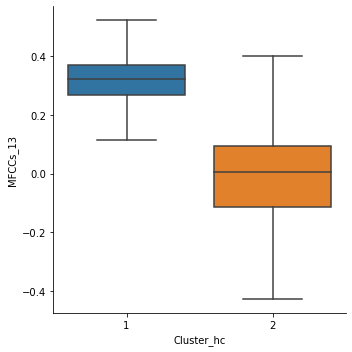

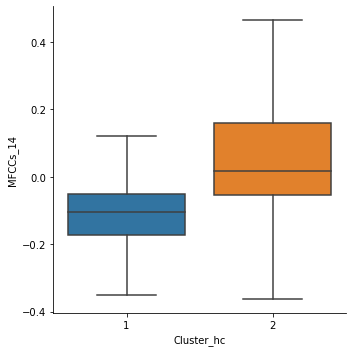

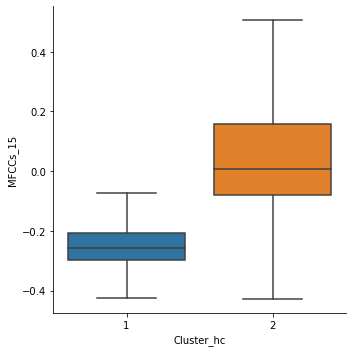

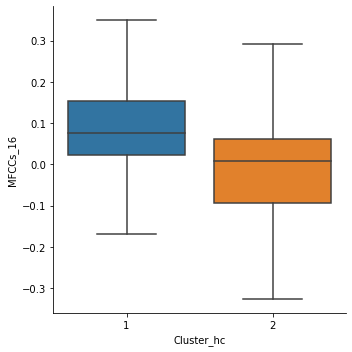

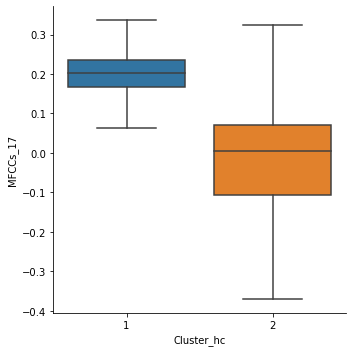

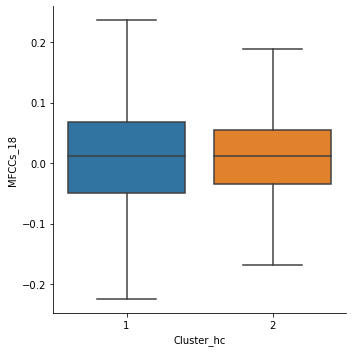

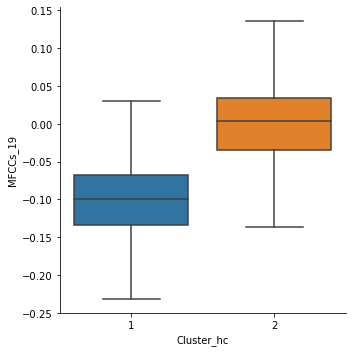

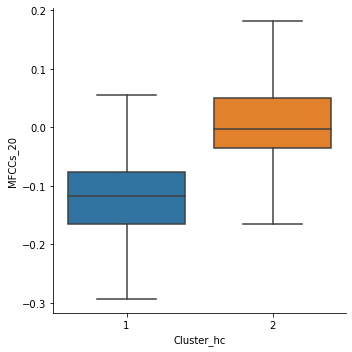

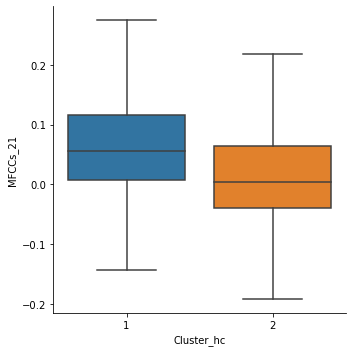

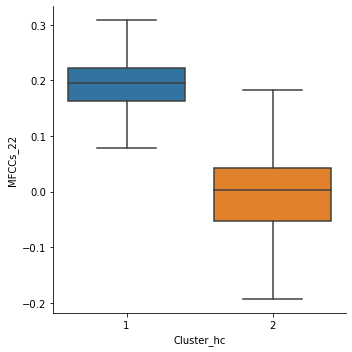

In [21]:
# Visualize characteristics of the identified clusters in terms of each feature
# Get feature list
mfcc_data["Cluster_hc"]  = labels_hc # Create one column "Cluster_hc"
feature_list = mfcc_data.drop(columns = ["Species", "Cluster", "Cluster_hc"]).columns.tolist() # "Cluster" from K-means clustering 

for var in feature_list:
    sns.catplot(x = "Cluster_hc",
                y = var, 
                kind = "box", 
                showfliers = False, # "showfliers" is used for the outliers
                data = mfcc_data) 

### c.	Please build a Gaussian mixture clustering to predict the categories of the samples. Please present how would you determine the number of clusters. (10%)

In [22]:
# Reference
# https://scikit-learn.org/stable/modules/mixture.html#gmm

In [23]:
# Import packages
from sklearn.mixture import GaussianMixture

In [24]:
# Build a Gaussian mixture clustering using the arbitrary number of clusters
gm = GaussianMixture(n_components = 2, random_state = 0).fit(X_scaled)
gm.means_ # Mean for each column

array([[1.        , 0.56700045, 0.44868075, 0.69313292, 0.56338281,
        0.31864931, 0.34178192, 0.54950671, 0.61907116, 0.66943298,
        0.44711293, 0.60335719, 0.60455052, 0.4078365 , 0.33598721,
        0.50833694, 0.56273505, 0.55816208, 0.46096881, 0.29167404,
        0.59965089, 0.70362098],
       [0.98471019, 0.62250397, 0.58535671, 0.5625664 , 0.47479359,
        0.41502533, 0.51720331, 0.47599329, 0.41853273, 0.69613118,
        0.64483379, 0.53205628, 0.4072146 , 0.53690157, 0.54015337,
        0.42176992, 0.37346172, 0.55866659, 0.54032326, 0.44280791,
        0.54451508, 0.46136503]])

In [25]:
# Predict the categories of the samples
gm.predict(X_scaled) 

array([1, 1, 1, ..., 1, 1, 1])

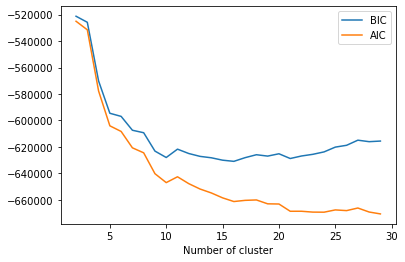

In [26]:
# Perform Gaussian mixture clustering with the optimal number of clusters
# Intepretation of AIC/BIC: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
n_components = np.arange(2, 30)
models = [GaussianMixture(n, covariance_type = "full", random_state = 0).fit(X_scaled)
          for n in n_components]
plt.plot(n_components, [m.bic(X_scaled) for m in models], label = "BIC")
plt.plot(n_components, [m.aic(X_scaled) for m in models], label = "AIC")
plt.legend(loc = "best")
plt.xlabel("Number of cluster")
plt.show()

/var/folders/s1/6460_yvs6ggdv14vc1dsk_r40000gn/T/ipykernel_5226/815174688.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2, n_components), silhouette_score, "bo-", color = "black")


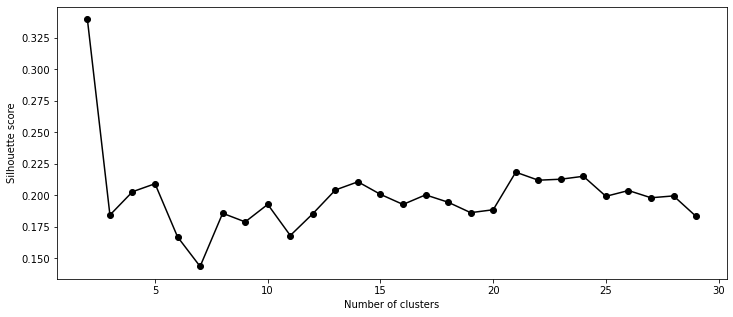

In [27]:
# Intepretation of Silhoutte score: https://towardsdatascience.com/gmm-gaussian-mixture-models-how-to-successfully-use-it-to-cluster-your-data-891dc8ac058f
n_components = 30
silhouette_score = []
for n in range(2, n_components):
    # Set the model and its parameters
    model = GaussianMixture(n, covariance_type = "full", random_state = 0)
    # Fit the model 
    labels = model.fit_predict(X_scaled)
    # Calculate Silhoutte Score and append to a list
    silhouette_score.append(metrics.silhouette_score(X_scaled, 
                                                     labels, 
                                                     metric = "euclidean"))
    
# Plot the silhouette score to measure clustering quality
plt.figure(figsize = (12, 5))
plt.plot(range(2, n_components), silhouette_score, "bo-", color = "black")
plt.ylabel("Silhouette score") 
plt.xlabel("Number of clusters")
plt.show()

In [28]:
# Considering the BIC and AIC (the lower, the better), and Silhoutte score (the higher, the better), 
# we determine the cluster number as 5
# Produce cluster labels
gmm = GaussianMixture(n_components = 5, random_state = 0).fit(X_scaled)
labels_gmm = gmm.predict(X_scaled) # Predict the categories of the samples

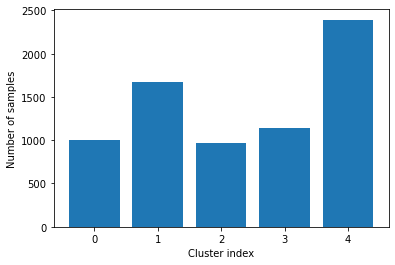

In [29]:
# Evaluate clusters
# Visualize cluster size distribution
unique_labels, lanel_cnts = np.unique(labels_gmm, return_counts = True) 
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("Number of samples")
plt.show()

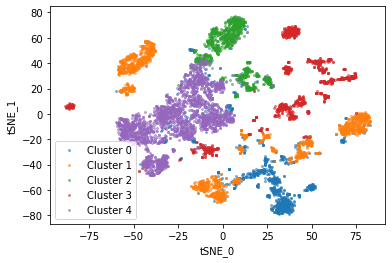

In [30]:
# Visualize the clusters in 2D t-SNE space 
for l in unique_labels: # l is "labels"--"l"
    plt.scatter(X_tsne[labels_gmm == l, 0], X_tsne[labels_gmm == l, 1], # labels_hc 
                s = 4, # Marker size
                alpha = 0.5, # Transparency 
                label = "Cluster %s" % l) # Label
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")
plt.legend(loc = "best") # Show legend 
plt.show()

In [31]:
# Output the categories of the samples
labels_gmm

array([3, 3, 3, ..., 3, 3, 3])

### d.	As we discussed at the class, after the clustering, we can consider each cluster as a class and use the class labels as supervised information. Then, we can train a supervised classification model to perform cluster assignment for new data samples. Could you please train a classification model (e.g., decision tree) based on your clustering results on (a), (b), or (c). Then use the model to predict the cluster labels of the new data in “Frogs_MFCCs_new.csv”. (20%)

In [32]:
# Import packages
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [33]:
# Recap the original feature data (NOT SCALED) and class labels derived from the K-means clustering results on (a)
# Decision tree in general does not usually require scaling
print("These are the scaled feature data:\n", X)
print(X.shape)
print()
print("These are the label data from K-means clustering:\n", labels_km)
print(labels_km.shape)

These are the scaled feature data:
       MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7163       1.0 -0.528595 -0.208051  0.103669  0.086537  0.408476  0.069610   
7164       1.0 -0.442139 -0.328404  0.031452  0.056017  0.424856  0.073288   
7165       1.0 -0.616029 -0.302357  0.063417  0.095671  0.439930  0.069414   
7166       1.0 -0.547168 -0.266780  0.056115  0.048947  0.423631  0.081924   
7167       1.0 -0.520958 -0.258779 -0.070416 -0.025129  0.447967  0.180033   

      MFCCs_ 8  MFCCs_ 9  M

In [34]:
# Train the model using Grid Search with cross-validation
# The goal is to identify the best hyper-parameters of the model
tree = DecisionTreeClassifier(criterion = "gini", 
                              class_weight = "balanced", 
                              random_state = 0,
                              max_features = None) # max_features = n_features

In [35]:
# Tune the parameters of max_depth, min_samples_leaf, and min_samples_split
# I have tried "max_leaf_nodes":[30, 50, 100, 200, 500], however, my laptop ran hours and crashed
grid = GridSearchCV(tree, 
                    param_grid = {"max_depth": range(2, 10),
                                  "min_samples_leaf": range(1, 10),
                                  "min_samples_split": range(2, 5)},
                    scoring = "accuracy",
                    cv = 5, 
                    return_train_score = True)
grid.fit(X, labels_km)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 5)},
             return_train_score=True, scoring='accuracy')

In [36]:
# Obtain grid results
scores = pd.DataFrame(grid.cv_results_)
scores

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.030063      0.004016         0.001406        0.000117   
1         0.027893      0.000947         0.001565        0.000338   
2         0.026159      0.000863         0.001245        0.000102   
3         0.027643      0.000849         0.001262        0.000138   
4         0.026595      0.000908         0.001209        0.000047   
..             ...           ...              ...             ...   
211       0.072275      0.008296         0.001275        0.000113   
212       0.079105      0.004874         0.001385        0.000080   
213       0.070813      0.007677         0.001252        0.000096   
214       0.069972      0.007373         0.001207        0.000053   
215       0.073518      0.005895         0.001321        0.000098   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
0                 2                      1                       2   
1                 2                      1                       3   
2                 2                      1                       4   
3                 2                      2                       2   
4                 2                      2                       3   
..              ...                    ...                     ...   
211               9                      8                       3   
212               9                      8                       4   
213               9                      9                       2   
214               9                      9                       3   
215               9                      9                       4   

                                                params  split0_test_score  \
0    {'max_depth': 2, 'min_samples_leaf': 1, 'min_s...           0.688982   
1    {'max_depth': 2, 'min_samples_leaf': 1, 'min_s...           0.688982   
2    {'max_depth': 2, 'min_samples_leaf': 1, 'min_s...           0.688982   
3    {'max_depth': 2, 'min_samples_leaf': 2, 'min_s...           0.688982   
4    {'max_depth': 2, 'min_samples_leaf': 2, 'min_s...           0.688982   
..                                                 ...                ...   
211  {'max_depth': 9, 'min_samples_leaf': 8, 'min_s...           0.927476   
212  {'max_depth': 9, 'min_samples_leaf': 8, 'min_s...           0.927476   
213  {'max_depth': 9, 'min_samples_leaf': 9, 'min_s...           0.931660   
214  {'max_depth': 9, 'min_samples_leaf': 9, 'min_s...           0.931660   
215  {'max_depth': 9, 'min_samples_leaf': 9, 'min_s...           0.931660   

     split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0             0.525802  ...         0.615509        0.063901              190   
1             0.525802  ...         0.615509        0.063901              190   
2             0.525802  ...         0.615509        0.063901              190   
3             0.525802  ...         0.615509        0.063901              190   
4             0.525802  ...         0.615509        0.063901              190   
..                 ...  ...              ...             ...              ...   
211           0.954672  ...         0.906090        0.066851              127   
212           0.954672  ...         0.906090        0.066851              127   
213           0.943515  ...         0.903719        0.065708              130   
214           0.943515  ...         0.903719        0.065708              130   
215           0.943515  ...         0.903719        0.065708              130   

     split0_train_score  split1_train_score  split2_train_score  \
0              0.658528            0.660272            0.655738   
1              0.658528            0.660272            0.655738   
2              0.658528            0.660272            0.655738   
3              0.658528            0.660272            0.655738   
4              0.658528            0.660272            0.655738   
..                  ...            

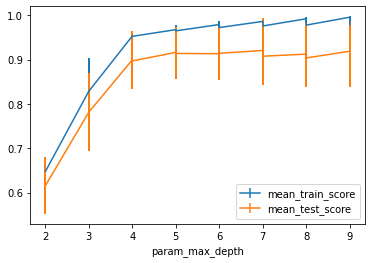

In [37]:
# Visulization of grid search
scores.plot(x = "param_max_depth", y = "mean_train_score", yerr = "std_train_score") 
scores.plot(x = "param_max_depth", y = "mean_test_score", yerr = "std_test_score",
            ax = plt.gca()) # ax = plt.gca(), keep plot at the samp axis
plt.legend()
plt.show()

In [38]:
# Obtain the best classifier
grid.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=3,
                       random_state=0)

In [39]:
# Load the testing set
X_test = pd.read_csv("Frogs_MFCCs_new.csv", delimiter = ",", header = None)
X_test

0         1         2         3         4         5         6   \
0   0.535765  0.352494  0.577996  0.619842 -0.636012  0.349842  1.000000   
1   1.000000  0.494415  0.716297  0.719341 -0.566960  0.284962  0.935137   
2   1.000000  0.533850  0.678507  0.680032 -0.404906  0.295116  0.607949   
3   1.000000  0.437712  0.470044  0.415742 -0.155385  0.168044  0.338758   
4   1.000000  0.381821  0.309101  0.266192 -0.013663  0.032924  0.156427   
5   1.000000  0.368191  0.315427  0.251104 -0.016359  0.034577  0.160057   
6   1.000000  0.365469  0.306161  0.247621 -0.019461  0.039508  0.167694   
7   1.000000  0.848643  0.696727  0.820554 -0.421177  0.245498  0.748802   
8   1.000000  0.365219  0.302074  0.243119 -0.021127  0.042855  0.170315   
9   1.000000  0.374068  0.306072  0.254090 -0.018934  0.030452  0.163877   
10  1.000000  0.387991  0.296133  0.242683 -0.013535  0.037167  0.154562   
11  1.000000  0.370228  0.292460  0.238956 -0.017449  0.042808  0.178751   
12  1.000000  0.374073  0.312736  0.257856 -0.022472  0.030931  0.174099   
13  1.000000  0.382738  0.302111  0.252848 -0.012804  0.035826  0.156207   
14  1.000000  0.372349  0.314135  0.251507 -0.012689  0.034633  0.161027   
15  1.000000  0.372253  0.309379  0.256076 -0.016746  0.026784  0.165429   
16  1.000000  0.381260  0.341090  0.244196 -0.014852  0.045172  0.148817   
17  1.000000  0.269821  0.759625  0.431490 -0.279978  0.253077  0.303068   
18  1.000000  0.193356  0.743382  0.446924 -0.237136  0.308670  0.290862   
19  1.000000  0.290192  0.787241  0.373429 -0.287106  0.332730  0.289710   
20  1.000000  0.234164  0.718584  0.407554 -0.182152  0.312742  0.237051   
21  1.000000  0.183284  0.665720  0.403381 -0.134429  0.236134  0.330517   
22  1.000000  0.160769  0.656832  0.444155 -0.227203  0.195941  0.347692   
23  1.000000  0.247157  0.771839  0.366411 -0.272889  0.312949  0.319815   
24  1.000000  0.137113  0.558589  0.386107 -0.128245  0.259170  0.185788   
25  1.000000  0.121701  0.655749  0.382980 -0.182346  0.308397  0.193224   
26  1.000000  0.172172  0.773635  0.396151 -0.178862  0.335773  0.207476   
27  1.000000  0.207528  0.352717  0.273682  0.139444  0.182432  0.070597   
28  1.000000  0.279408  0.389626  0.276839  0.113471  0.160172  0.069351   
29  1.000000  0.473296  0.612738  0.529802  0.168956  0.173200  0.093227   
30  1.000000  0.219132  0.328145  0.276312  0.138941  0.161799  0.069704   
31  1.000000  0.489847  0.424027  0.296975  0.067894  0.138432  0.018261   

          7         8         9   ...        12        13        14        15  \
0  -0.055513 -0.587313  0.064357  ...  0.480957  0.575749 -0.089403 -0.216103   
1  -0.036480 -0.520712  0.159460  ...  0.398134  0.331624 -0.079822 -0.138120   
2  -0.021976 -0.350665  0.182364  ...  0.216419  0.306842 -0.105879 -0.192478   
3  -0.001274 -0.141813  0.100253  ...  0.124992  0.113891 -0.067155 -0.061040   
4   0.060886 -0.063734  0.023087  ...  0.002684  0.047097  0.015042 -0.026202   
5   0.060006 -0.067722  0.017479  ... -0.000123  0.048312  0.023397 -0.021775   
6   0.055971 -0.065366  0.021483  ...  0.004262  0.051256  0.023151 -0.023445   
7  -0.005327 -0.257568  0.100619  ...  0.153506  0.325442  0.020959 -0.119054   
8   0.057147 -0.069078  0.015318  ...  0.006217  0.051402  0.022926 -0.023163   
9   0.058837 -0.071400  0.018161  ... -0.008895  0.046819  0.028255 -0.021073   
10  0.059055 -0.067425  0.023444  ... -0.009271  0.046751  0.027402 -0.023100   
11  0.061136 -0.080484  0.004143  ... -0.000701  0.053552  0.028901 -0.029730   
12  0.064740 -0.079930  0.017972  ... -0.007572  0.056721  0.029084 -0.027917   
13  0.061290 -0.068182  0.018282  ... -0.004767  0.048463  0.027118 -0.027372   
14  0.058385 -0.068520  0.020639  ... -0.003087  0.043635  0.023802 -0.023407   
15  0.061705 -0.068653  0.014598  ... -0.008165  0.044736  0.029770 -0.022041   
16  0.060790 -0.053677  0.003635  ... -0.009621  0.056965  0.030561 -0.028528   
17 -0.269918 -0.020257  0.179458  ...  0.24

In [40]:
# Check the used features
feature_used = mfcc_data.drop(columns = ["Species", "Cluster", "Cluster_hc"]).columns.tolist()
print("The used features are:\n",feature_used)

The used features are:
 ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']


[1.09056370e-02 1.23455991e-02 2.23573913e-01 1.50515215e-02
 3.30379465e-03 4.08120830e-03 2.11797512e-01 1.16237637e-03
 6.22912479e-03 4.62159467e-03 3.67060063e-02 1.93666480e-01
 8.36907314e-03 6.43081892e-03 2.29544977e-01 5.66313948e-05
 9.77953455e-04 4.10377797e-17 1.17374153e-04 3.97197730e-05
 1.56226891e-04 3.08624581e-02]


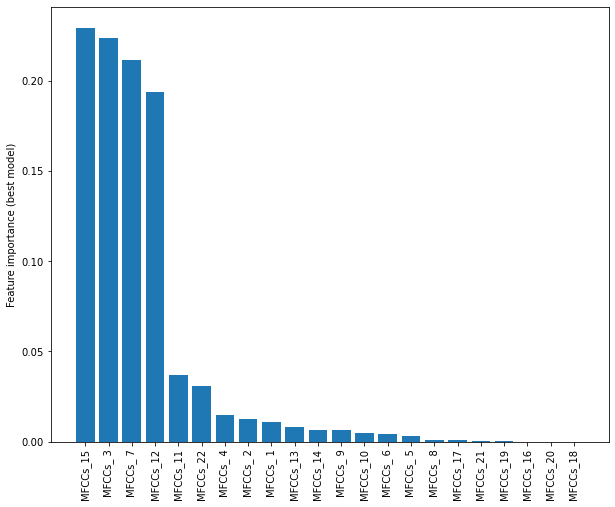

In [41]:
# Feature importance based on the best model
# Obtain feature importance value
importances = grid.best_estimator_.feature_importances_ 
print(importances)

# Return the indices of an array sorted by descending order
indices = np.argsort(-importances) 

# Plot feature importance figure
plt.figure(figsize = (10, 8))
plt.bar(np.array(feature_used)[indices], importances[indices]) 
plt.ylabel("Feature importance (best model)") 
plt.xticks(rotation = 90)
plt.show()

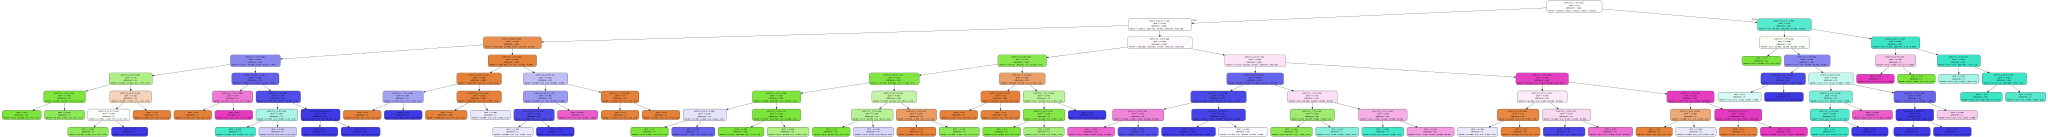

In [42]:
# Visualization decision tree (best model)
dot_data = export_graphviz(grid.best_estimator_,
                           out_file = None, 
                           feature_names = feature_used, 
                           filled = True,
                           rounded = True, 
                           special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

In [43]:
# Another way to wisualize decision tree (best model)
# Download packages
# conda install pydotplus
# pip install dtreeviz
# Import packages
import matplotlib.pyplot as plt
import pydotplus
from io import StringIO
from ipywidgets import Image
from dtreeviz.trees import *

In [44]:
# Check the unique names of features and labels
feature_unique = feature_used
print("The unique features are:\n", feature_unique)
print()
label_unique = set(labels_km.tolist())
print("The unique labels are:\n", label_unique)

The unique features are:
 ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']

The unique labels are:
 {0, 1, 2, 3, 4}


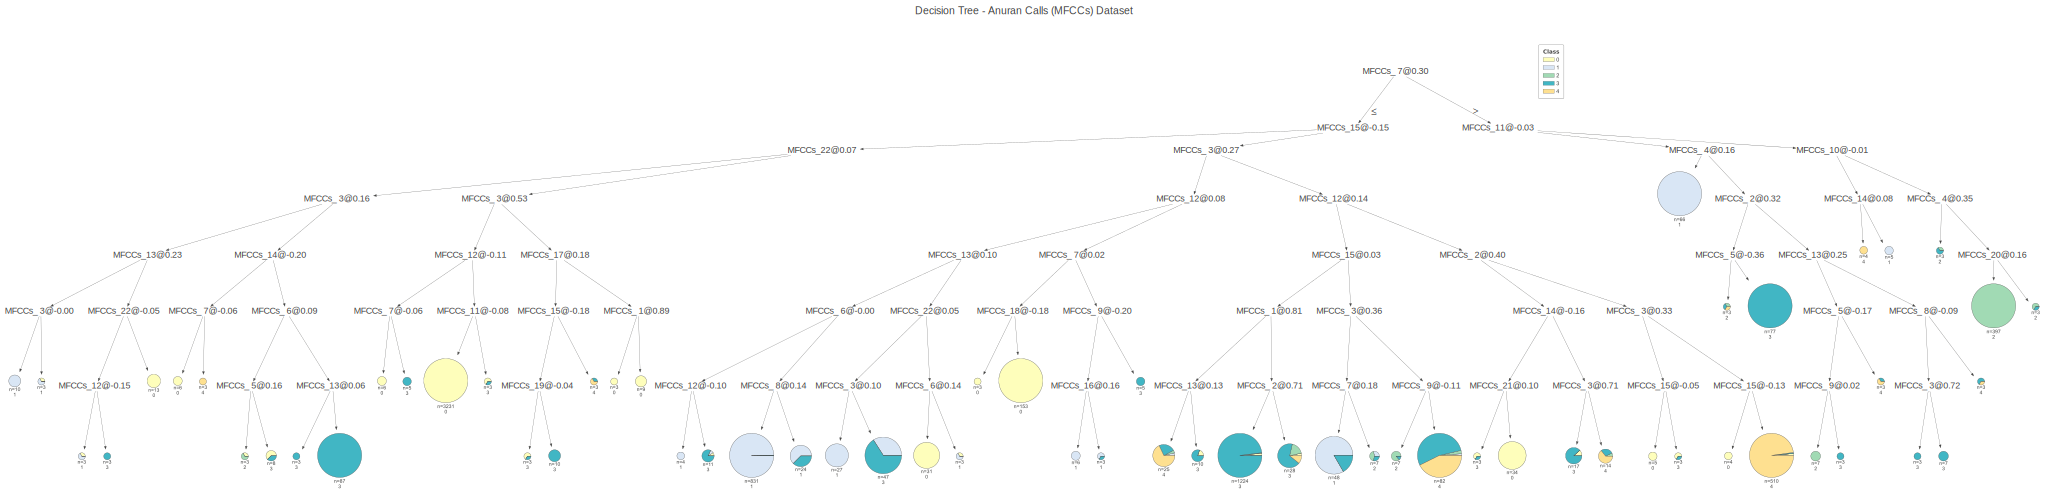

In [45]:
# Try dtreeviz visualization approach
viz = dtreeviz(grid.best_estimator_, 
               x_data = X,
               y_data = labels_km,
               target_name = "Class",
               feature_names = feature_unique, 
               class_names = list(label_unique), 
               title = "Decision Tree - Anuran Calls (MFCCs) Dataset",
               fancy = False) # Histogram distracts our attention on the big picture of how decision tree works, therefore, I turn it off.
viz

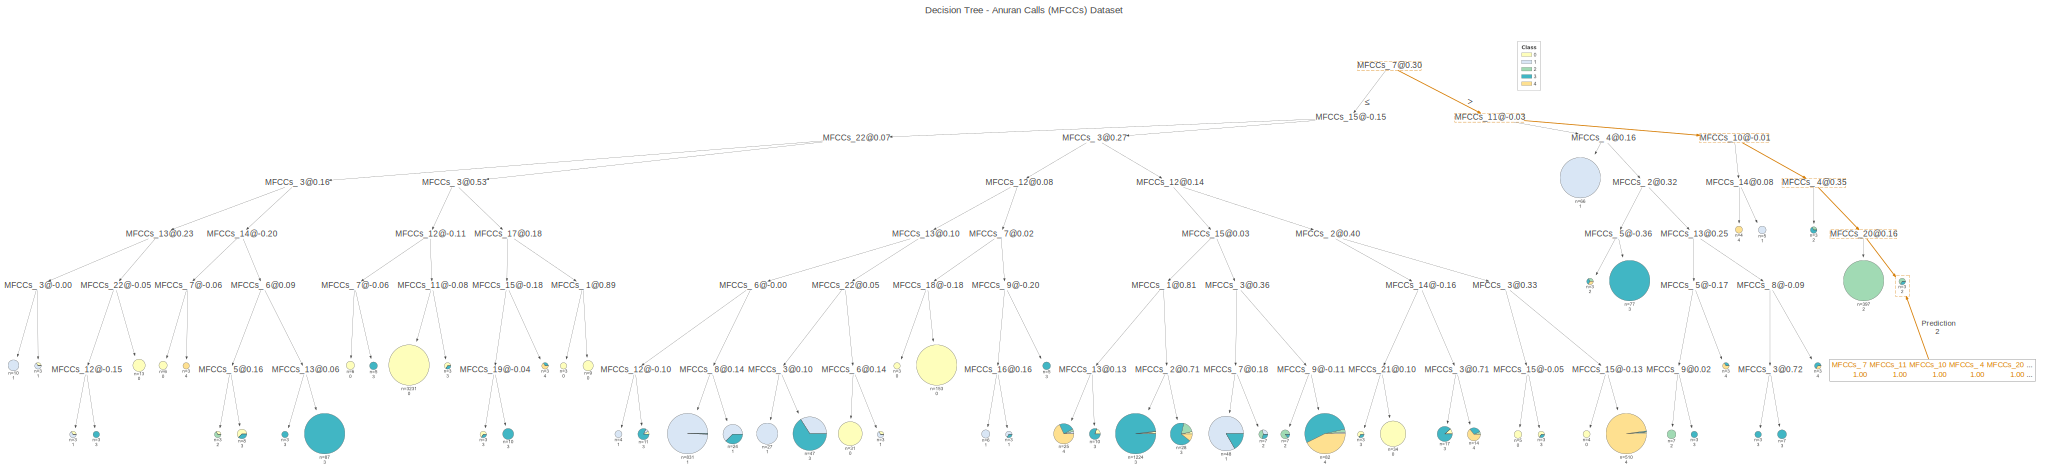

In [46]:
# Highlight the path of the first observation of the test set
viz = dtreeviz(grid.best_estimator_, 
               x_data = X,
               y_data = labels_km,
               target_name = "Class",
               feature_names = feature_unique, 
               class_names = list(label_unique), 
               title = "Decision Tree - Anuran Calls (MFCCs) Dataset",
               fancy = False,
               X = X_test[0])
viz
# Thank our TA for sharing interesting resources on intuitive visualization and elegant communications!

In [47]:
print(grid.best_estimator_.get_depth())

7


In [48]:
# Predict the cluster labels of the new data
y_pred = grid.best_estimator_.predict(X_test) 
y_pred

array([4, 4, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

## 2. Parkinson Dataset with replicated acoustic features Data Set (http://archive.ics.uci.edu/ml/datasets/Parkinson+Dataset+with+replicated+acoustic+features+) contains acoustic features extracted from 3 voice recording replications of the sustained /a/ phonation for each one of the 80 subjects (Some of them with Parkinson's Disease, i.e., status=1). Please find the data as Parkinson.csv file. (Hint: columns ‘ID’ and ‘Recording’ can not be considered as the features) (50%).

### a.	Please visualize the data (with label distribution) in 2D PCA space. (10%)

In [49]:
# Import packages
from sklearn.decomposition import PCA
import pylab 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [50]:
# Create a Pandas DataFrame through importing a csv file
# Read CSV file
parkinson_data = pd.read_csv("Parkinson.csv", delimiter = ",", header = 0)
parkinson_data.shape

(240, 48)

In [51]:
# Check the missing distribution
parkinson_data.isnull().sum()/len(parkinson_data)

ID            0.0
Recording     0.0
Status        0.0
Gender        0.0
Jitter_rel    0.0
Jitter_abs    0.0
Jitter_RAP    0.0
Jitter_PPQ    0.0
Shim_loc      0.0
Shim_dB       0.0
Shim_APQ3     0.0
Shim_APQ5     0.0
Shi_APQ11     0.0
HNR05         0.0
HNR15         0.0
HNR25         0.0
HNR35         0.0
HNR38         0.0
RPDE          0.0
DFA           0.0
PPE           0.0
GNE           0.0
MFCC0         0.0
MFCC1         0.0
MFCC2         0.0
MFCC3         0.0
MFCC4         0.0
MFCC5         0.0
MFCC6         0.0
MFCC7         0.0
MFCC8         0.0
MFCC9         0.0
MFCC10        0.0
MFCC11        0.0
MFCC12        0.0
Delta0        0.0
Delta1        0.0
Delta2        0.0
Delta3        0.0
Delta4        0.0
Delta5        0.0
Delta6        0.0
Delta7        0.0
Delta8        0.0
Delta9        0.0
Delta10       0.0
Delta11       0.0
Delta12       0.0
dtype: float64

The number of case is 120
The number of control is 120

Proportion of case: 50.00%


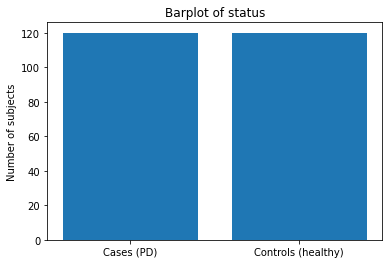

In [52]:
# Explore the distributions of cases and controls
n_case = len(parkinson_data[parkinson_data["Status"] == 1]) 
n_control = len(parkinson_data[parkinson_data["Status"] == 0])

print("The number of case is", n_case)
print("The number of control is", n_control)
print()
print("Proportion of case: %.2f%%" % (100 * n_case / (n_control + n_case)))

# Visualize case-control distribution
# Plot the distribution of class label - status
plt.bar(["Cases (PD)", "Controls (healthy)"], [n_case, n_control]) # Make barplot
plt.title("Barplot of status") # Add title
plt.ylabel("Number of subjects") # Modify y-axis label
plt.show()

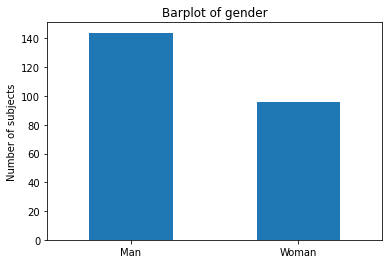

In [53]:
# Plot the distribution of binary feature - gender
gender_plot = parkinson_data["Gender"].value_counts().plot.bar(rot = 0) # Make barplot
plt.title("Barplot of gender") # Add title
gender_plot.set_xticklabels(["Man", "Woman"]) # Modify x-axis tick labels
plt.ylabel("Number of subjects") # Modify y-axis label
plt.show()

In [54]:
# Check other continuous feature distributions
# Remove columns "ID" and "Recording" as they can not be considered as features
parkinson_data.drop(columns = ["ID", "Recording", "Status", "Gender"]).describe()

Jitter_rel  Jitter_abs  Jitter_RAP  Jitter_PPQ    Shim_loc     Shim_dB  \
count  240.000000  240.000000  240.000000  240.000000  240.000000  240.000000   
mean     0.583987    0.000044    0.003172    0.003532    0.038428    0.336832   
std      0.535769    0.000045    0.003373    0.004449    0.023213    0.205905   
min      0.148010    0.000007    0.000678    0.001036    0.007444    0.064989   
25%      0.298260    0.000019    0.001551    0.001867    0.024336    0.211785   
50%      0.481455    0.000035    0.002337    0.002870    0.032960    0.287885   
75%      0.681685    0.000056    0.003678    0.003991    0.045475    0.399860   
max      6.838200    0.000550    0.043843    0.065199    0.192600    1.747600   

        Shim_APQ3   Shim_APQ5   Shi_APQ11       HNR05  ...      Delta3  \
count  240.000000  240.000000  240.000000  240.000000  ...  240.000000   
mean     0.021499    0.023468    0.028671   59.328203  ...    1.343238   
std      0.013787    0.014402    0.016610   14.541946  ...    0.198174   
min      0.003344    0.004103    0.006459   22.224723  ...    0.766458   
25%      0.012910    0.014985    0.019180   50.558623  ...    1.208624   
50%      0.018571    0.019897    0.024909   59.742330  ...    1.351015   
75%      0.025784    0.027900    0.033757   68.686365  ...    1.488878   
max      0.113240    0.120760    0.142440  101.206326  ...    1.860588   

           Delta4      Delta5      Delta6      Delta7      Delta8      Delta9  \
count  240.000000  240.000000  240.000000  240.000000  240.000000  240.000000   
mean     1.348914    1.337717    1.341786    1.340895    1.343978    1.341472   
std      0.212008    0.204978    0.209407    0.213689    0.211364    0.204085   
min      0.840133    0.741690    0.759689    0.764649    0.762798    0.811942   
25%      1.221101    1.197868    1.194186    1.194138    1.191881    1.189515   
50%      1.342237    1.337233    1.338437    1.344416    1.335517    1.349243   
75%      1.470287    1.485597    1.496845    1.490389    1.495355    1.475330   
max      2.038241    1.785984    1.988090    1.872799    1.920131    1.943331   

          Delta10     Delta11     Delta12  
count  240.000000  240.000000  240.000000  
mean     1.331433    1.346381    1.346144  
std      0.211297    0.221484    0.208819  
min      0.777012    0.643132    0.748411  
25%      1.192397    1.202525    1.206559  
50%      1.333345    1.347297    1.331212  
75%      1.472589    1.506674    1.475235  
max      1.949679    1.918392    1.930103  

[8 rows x 44 columns]

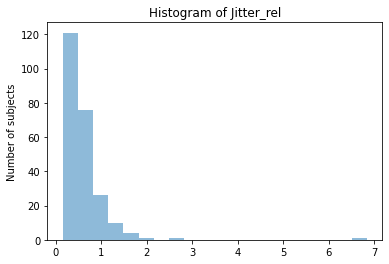

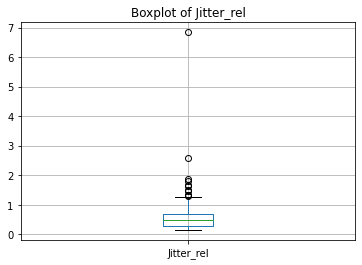

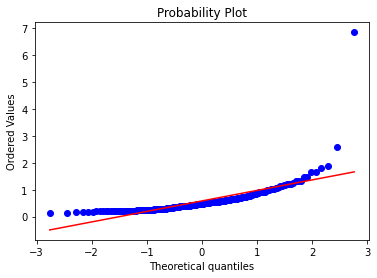

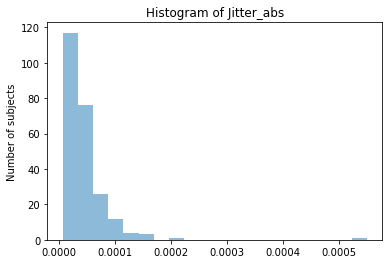

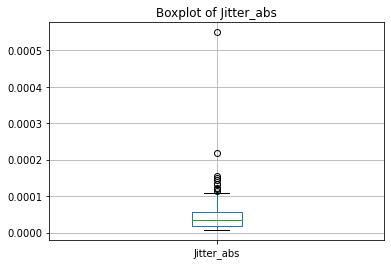

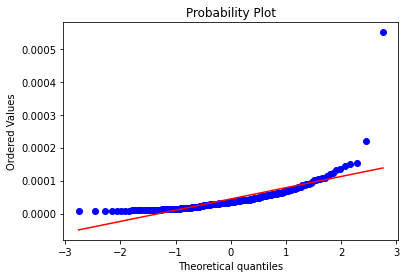

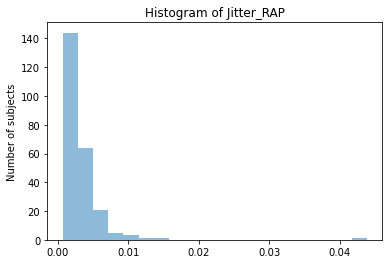

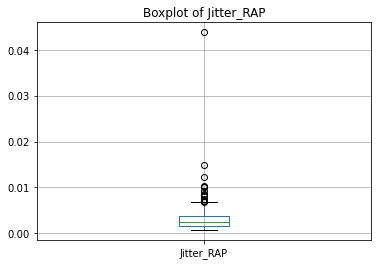

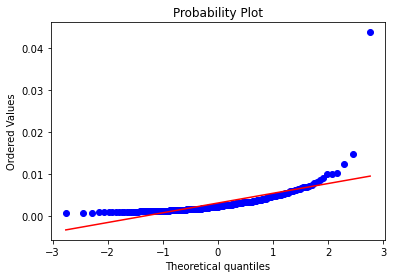

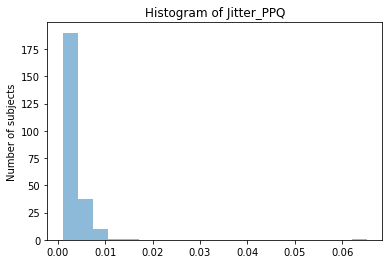

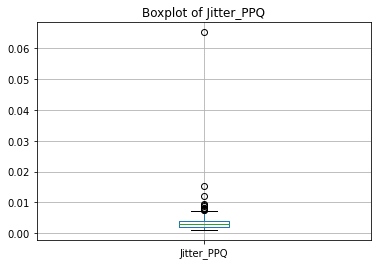

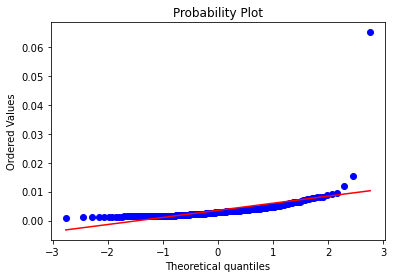

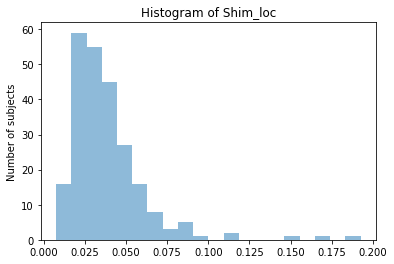

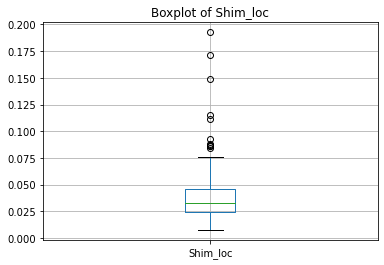

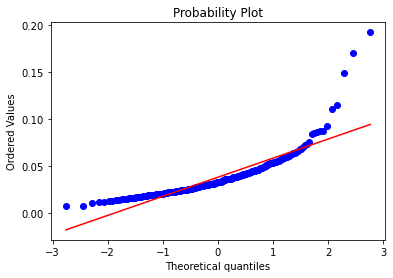

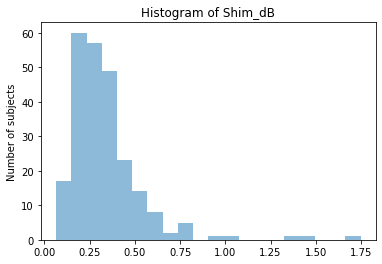

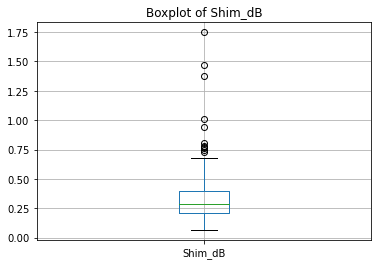

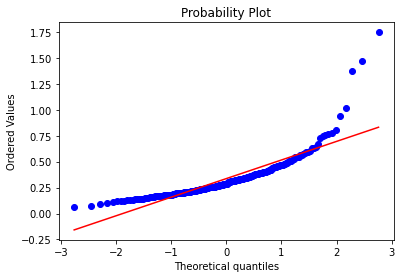

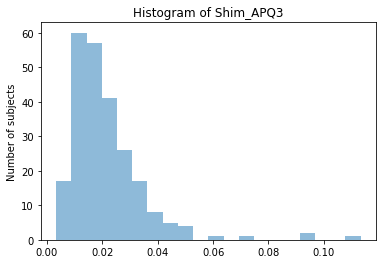

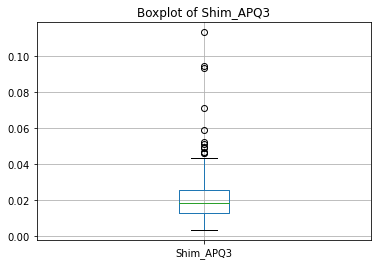

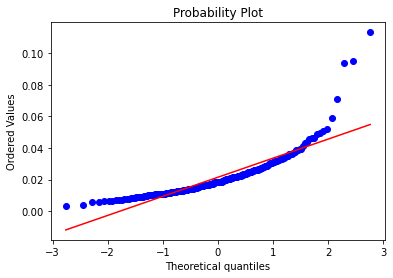

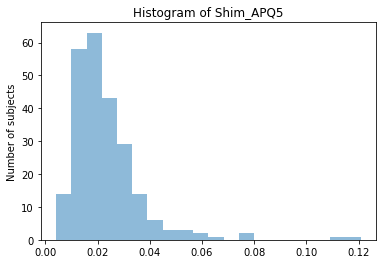

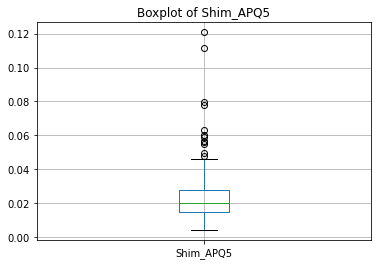

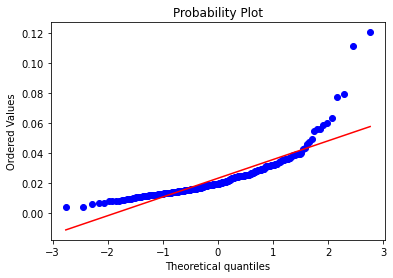

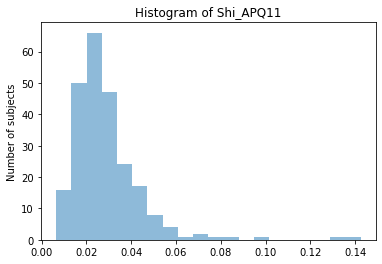

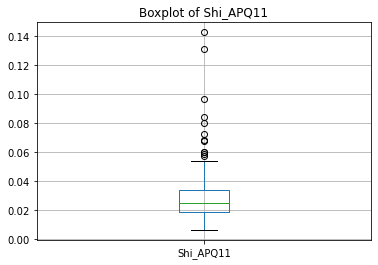

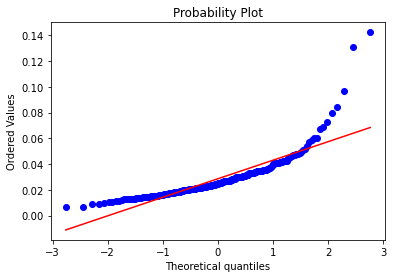

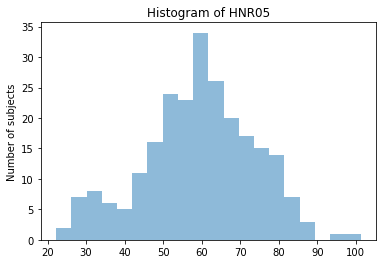

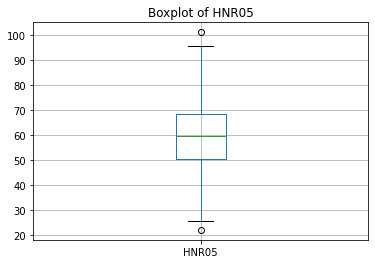

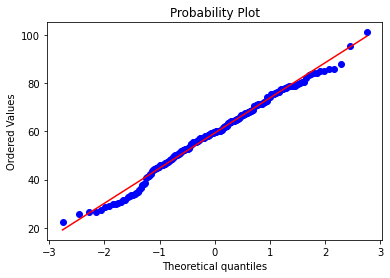

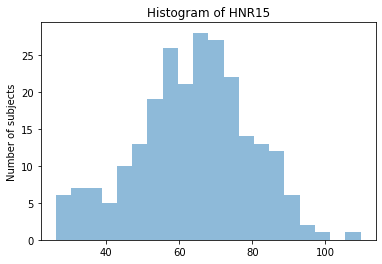

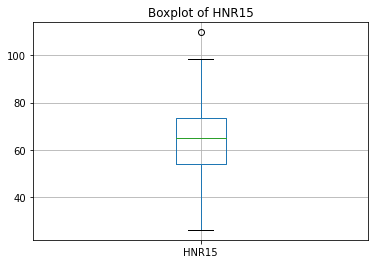

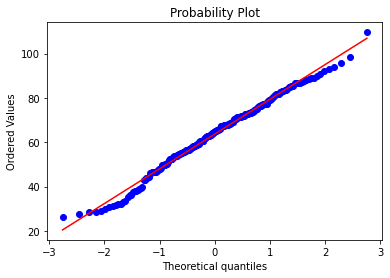

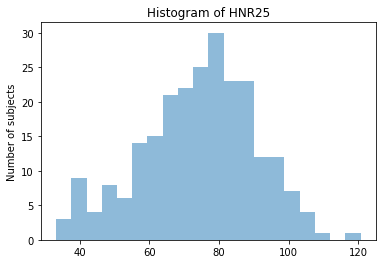

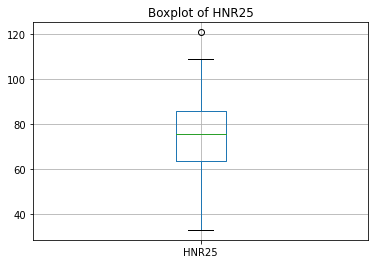

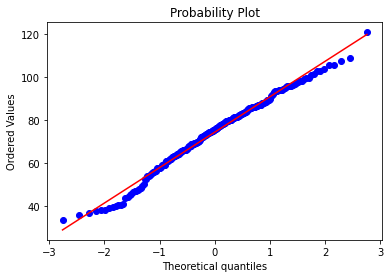

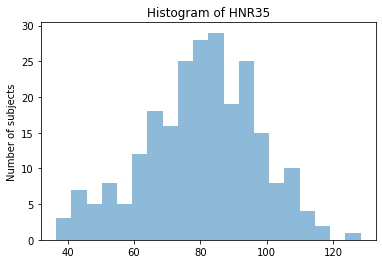

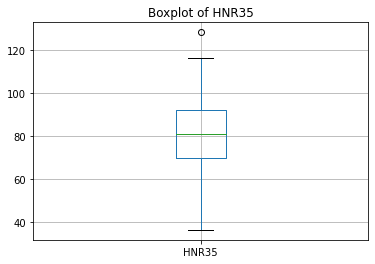

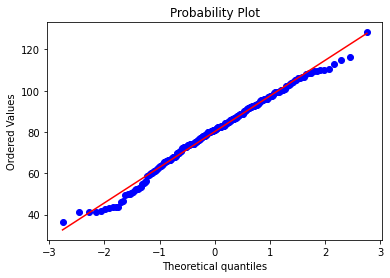

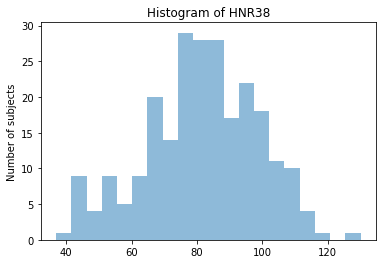

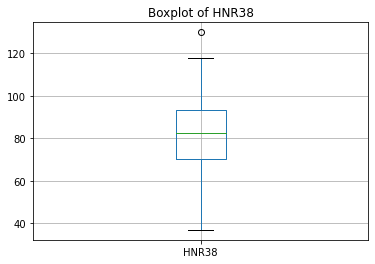

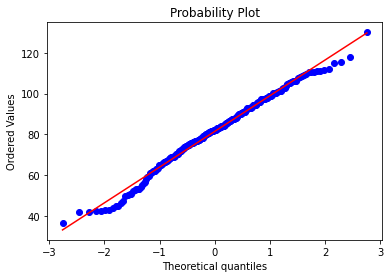

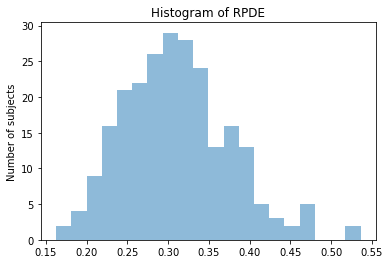

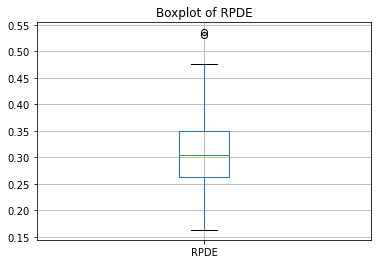

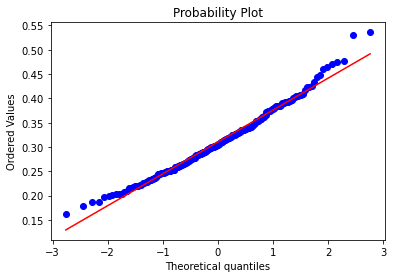

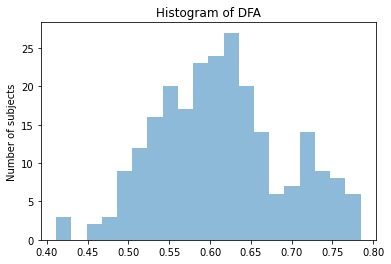

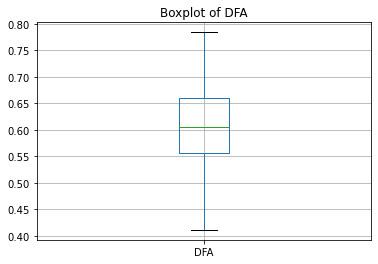

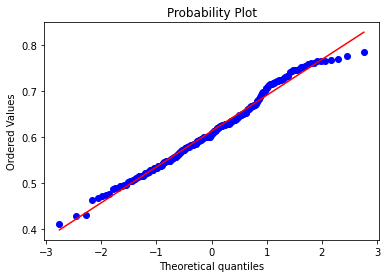

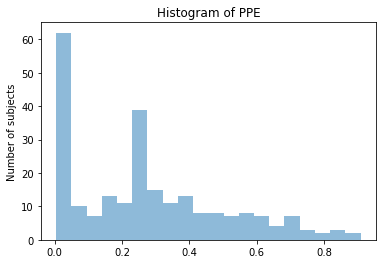

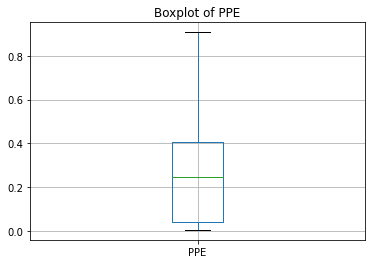

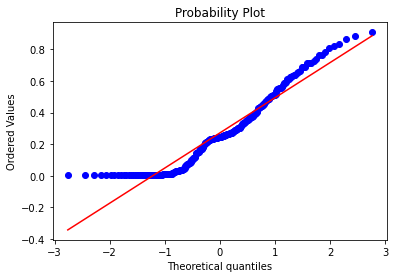

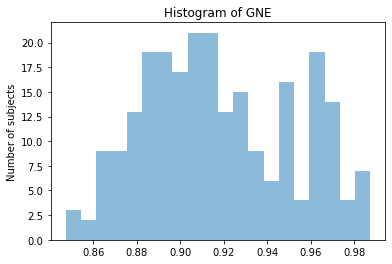

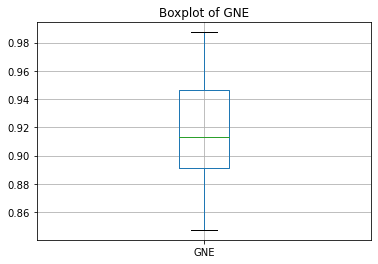

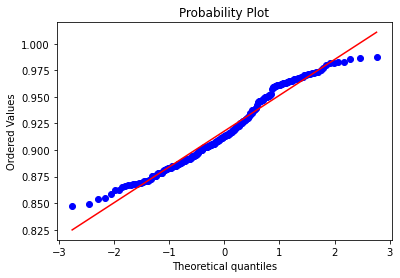

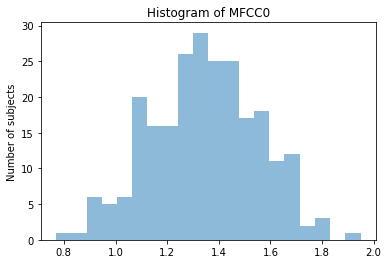

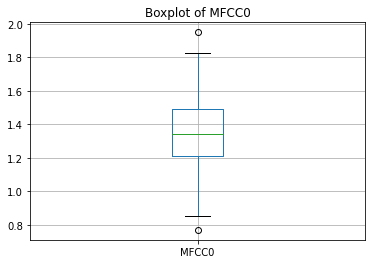

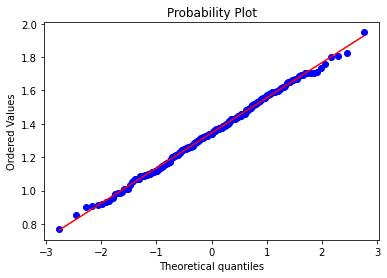

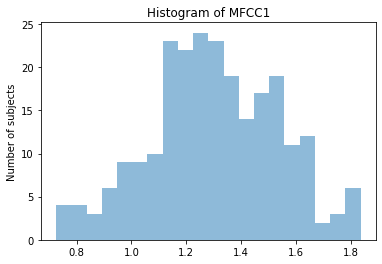

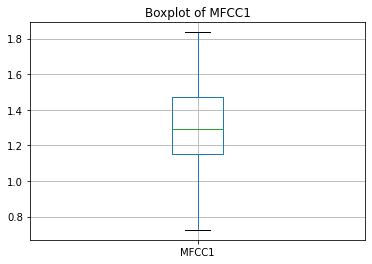

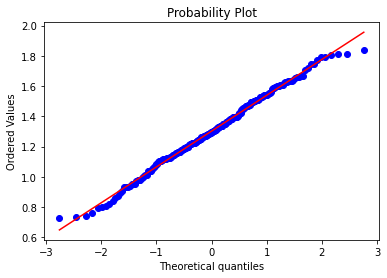

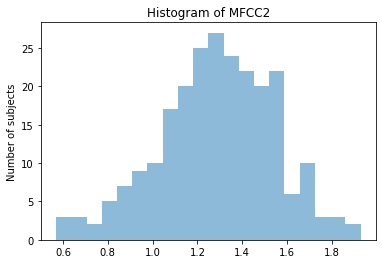

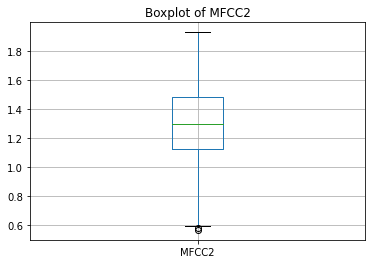

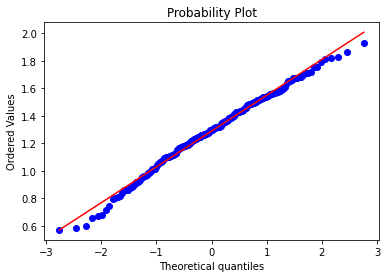

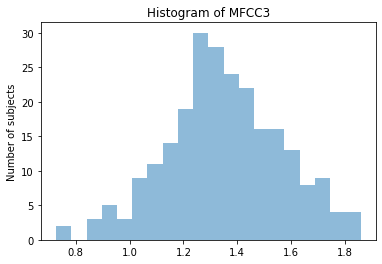

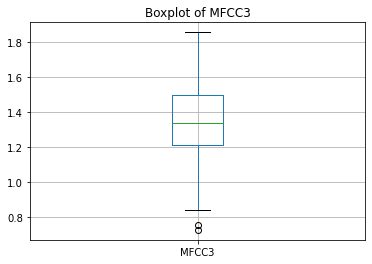

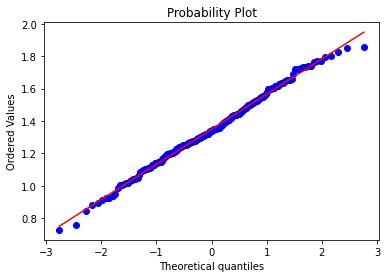

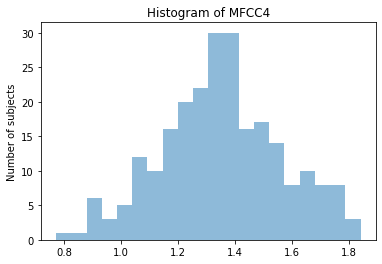

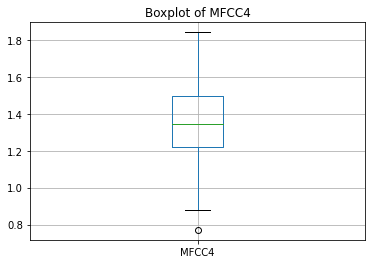

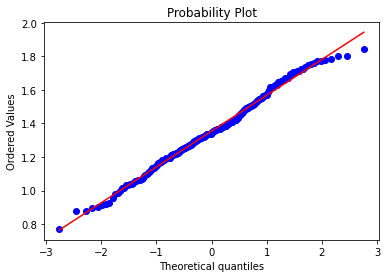

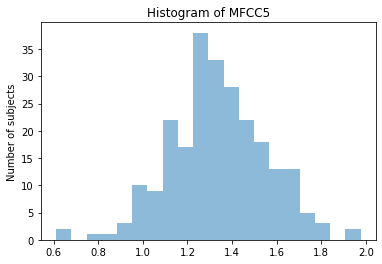

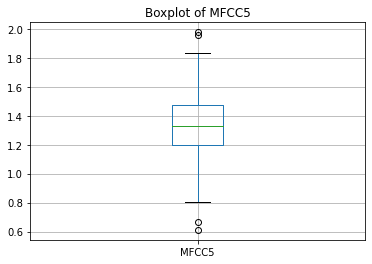

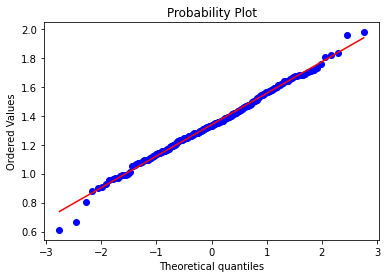

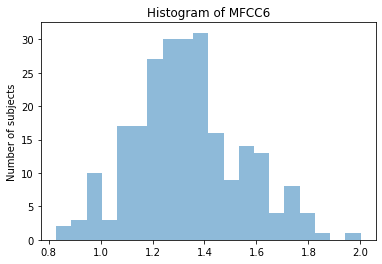

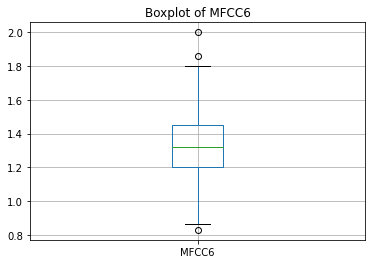

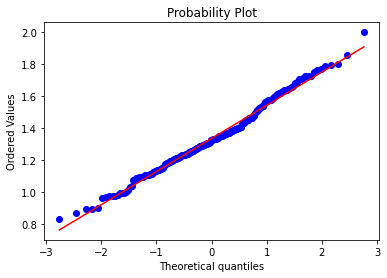

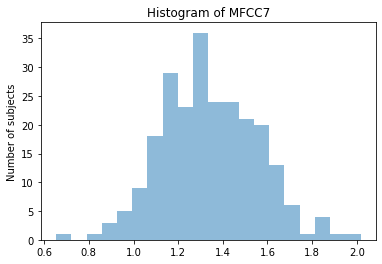

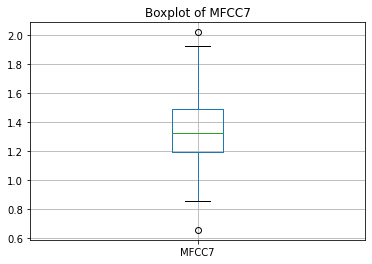

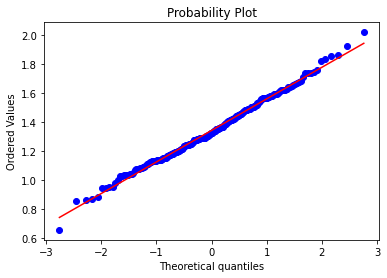

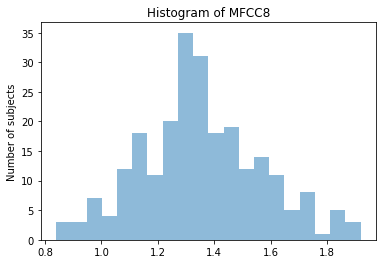

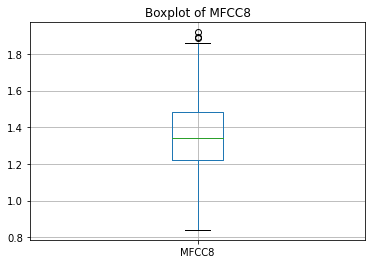

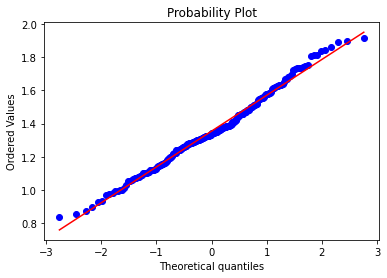

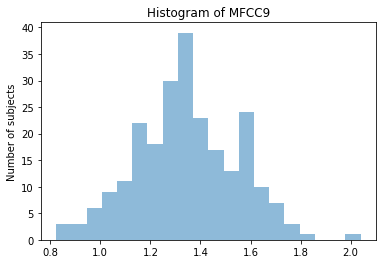

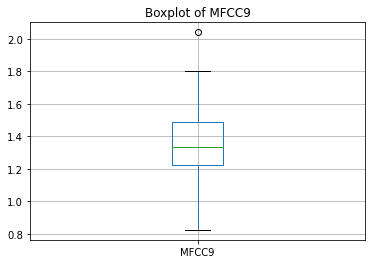

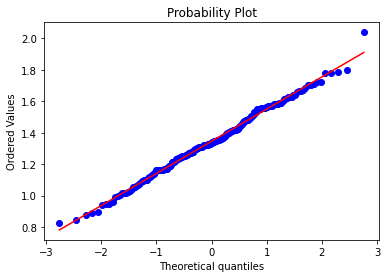

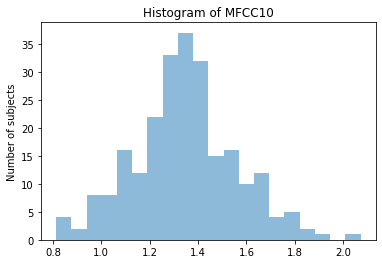

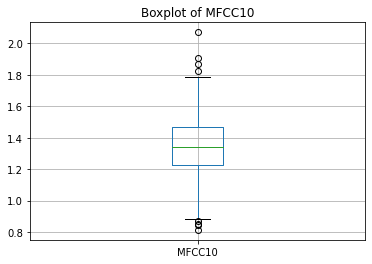

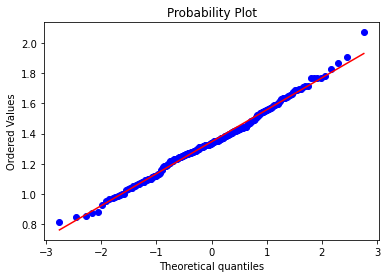

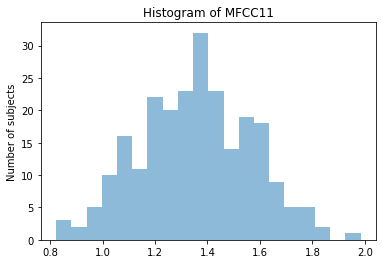

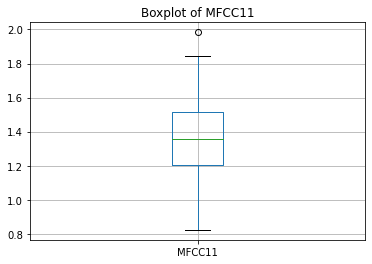

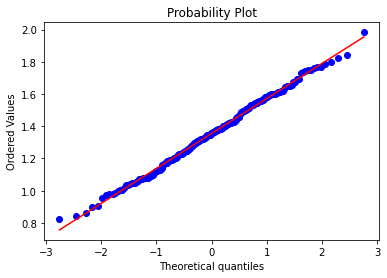

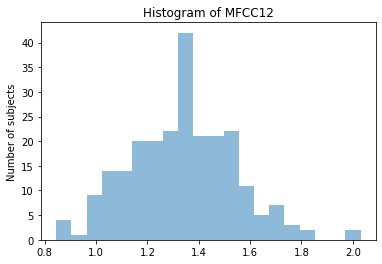

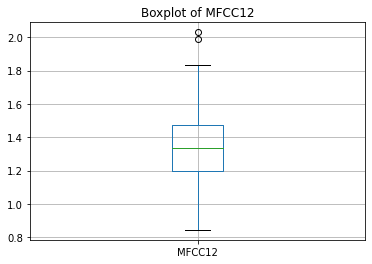

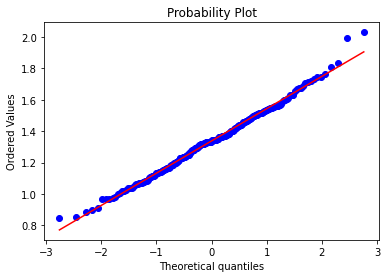

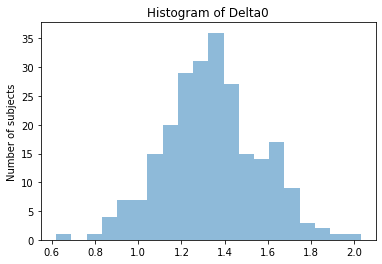

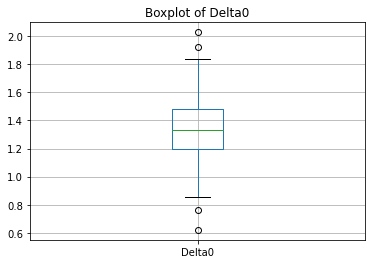

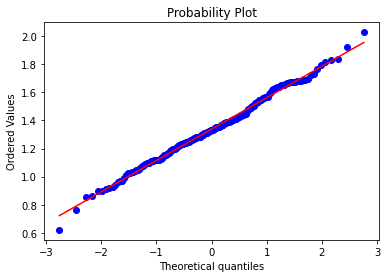

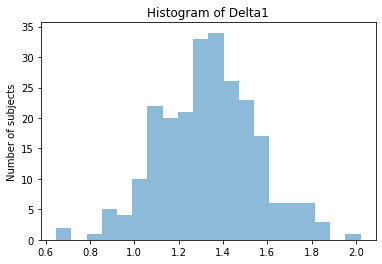

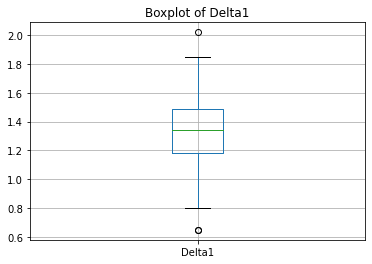

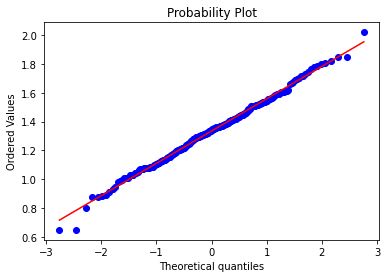

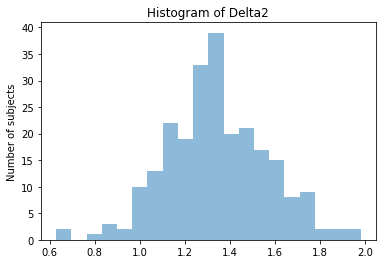

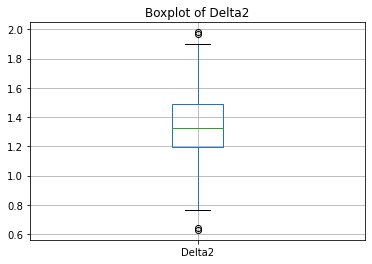

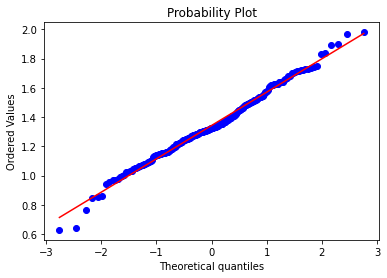

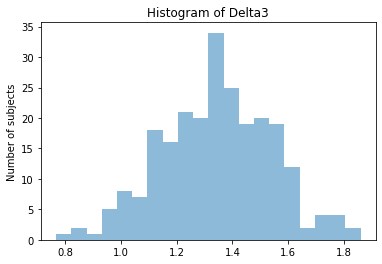

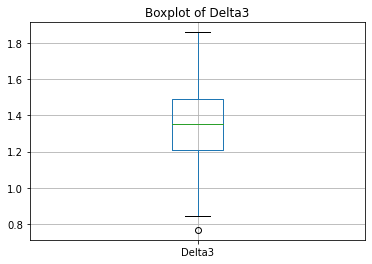

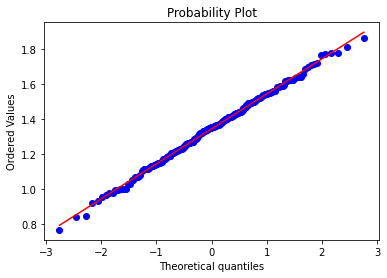

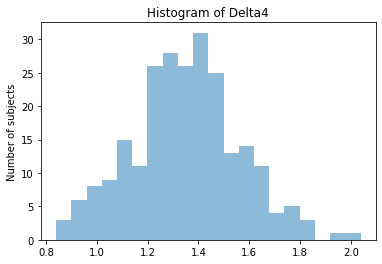

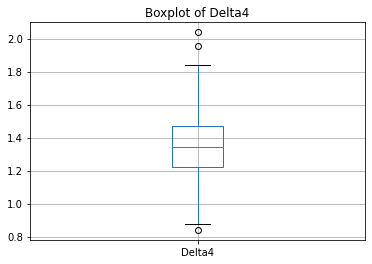

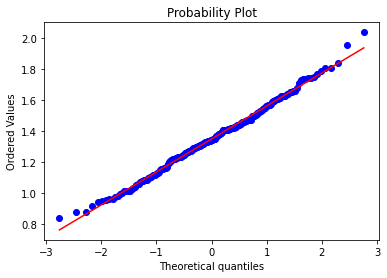

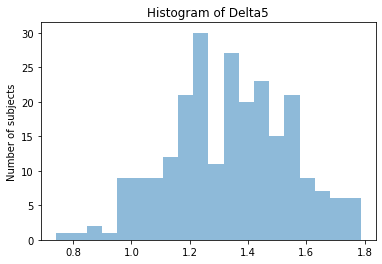

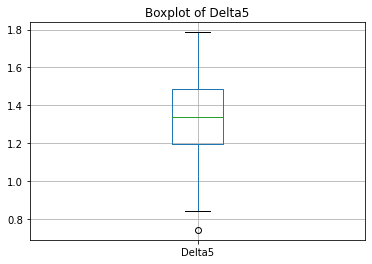

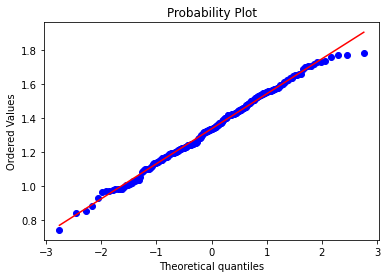

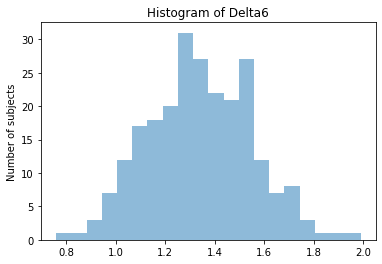

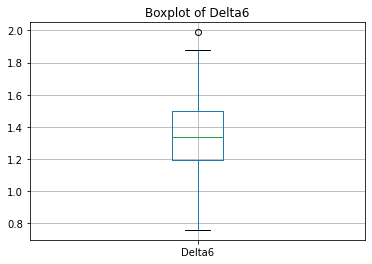

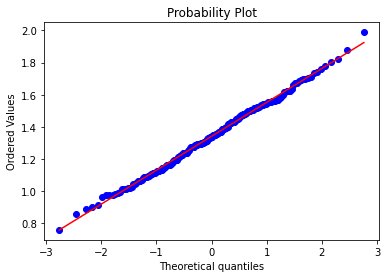

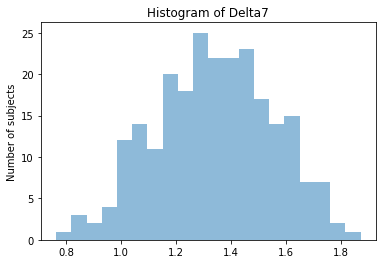

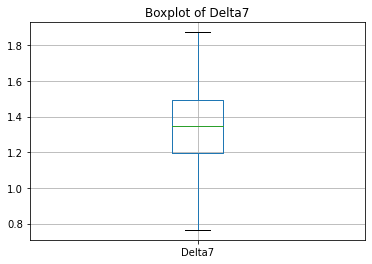

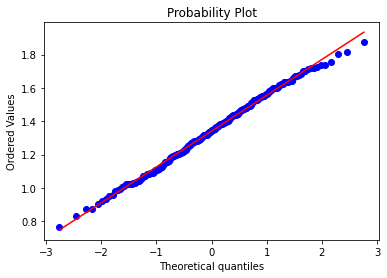

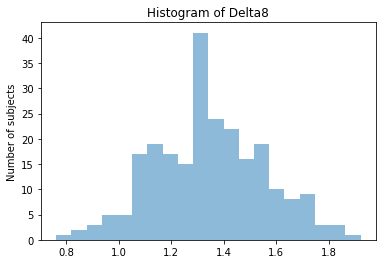

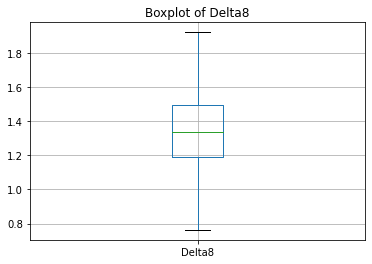

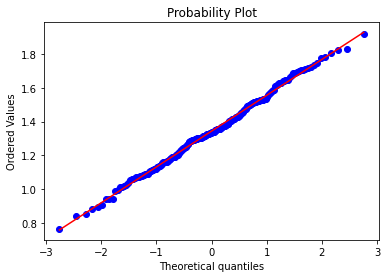

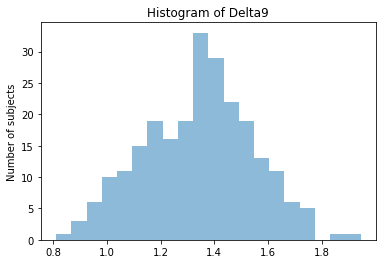

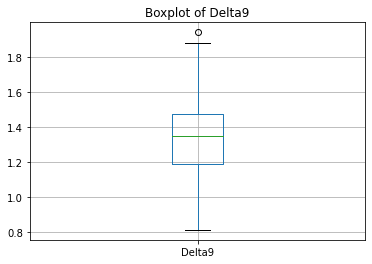

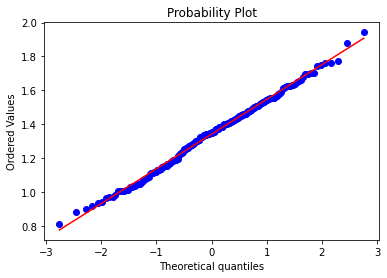

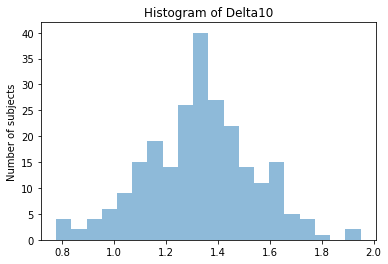

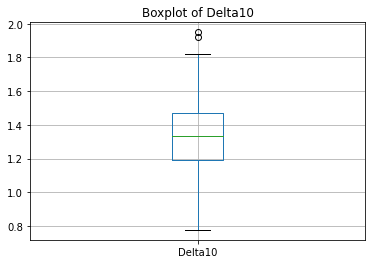

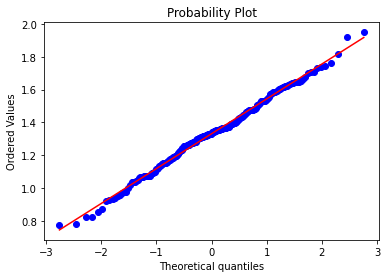

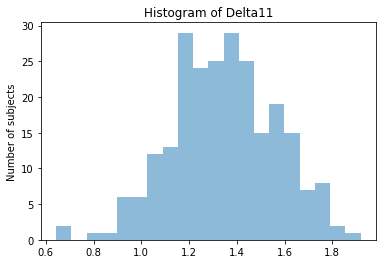

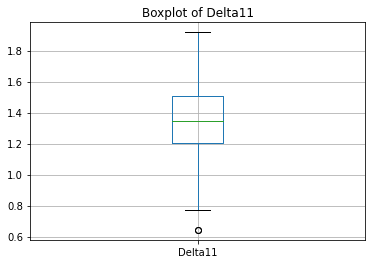

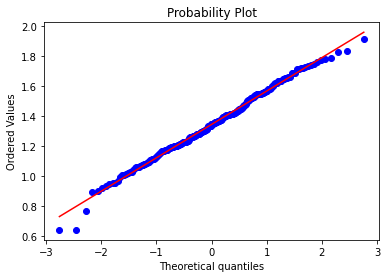

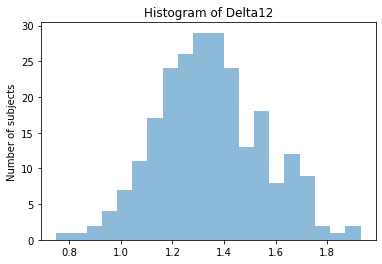

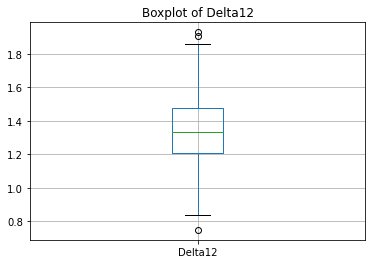

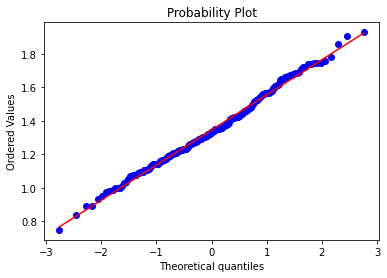

In [55]:
# Create a function that simultaneously ouputs histogram, boxplot, and Q-Q normal plot for numerical variables
def numerical_plot(variable_name):
    # Make histogram
    parkinson_plot = parkinson_data[variable_name].plot.hist(bins = 20, alpha = 0.5)
    plt.title("Histogram of " + variable_name) # Add title
    plt.ylabel("Number of subjects") # Modify y-axis label
    plt.show() 
    # Make boxplot
    parkinson_plot = parkinson_data.boxplot(column = [variable_name])
    plt.title("Boxplot of " + variable_name) # Add title
    parkinson_plot.set_xticklabels([variable_name]) # Modify x-axis tick label
    plt.show()
    # Make Q-Q normal plot
    stats.probplot(parkinson_data[variable_name], dist = "norm", plot = pylab)
    pylab.show()

# Plot the distributions of continuous features
numerical_features = ["Jitter_rel", "Jitter_abs", "Jitter_RAP", "Jitter_PPQ",
                      "Shim_loc", "Shim_dB", "Shim_APQ3", "Shim_APQ5", "Shi_APQ11", 
                      "HNR05", "HNR15", "HNR25", "HNR35", "HNR38", "RPDE", "DFA", 
                      "PPE", "GNE", "MFCC0", "MFCC1", "MFCC2", "MFCC3", "MFCC4", 
                      "MFCC5", "MFCC6", "MFCC7", "MFCC8", "MFCC9", "MFCC10", 
                      "MFCC11", "MFCC12", "Delta0", "Delta1", "Delta2", "Delta3", 
                      "Delta4", "Delta5", "Delta6", "Delta7", "Delta8", "Delta9", 
                      "Delta10", "Delta11", "Delta12"]

for feature in numerical_features:
    numerical_plot(variable_name = feature)  


/Users/anniliu/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


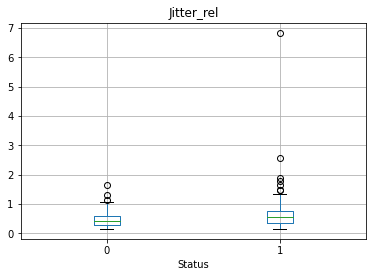

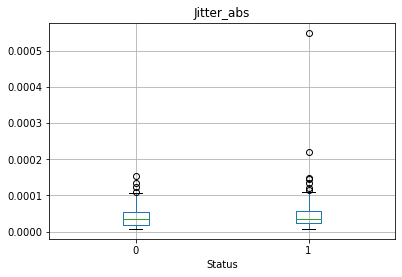

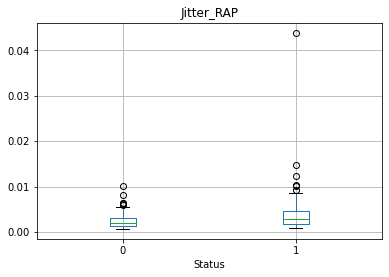

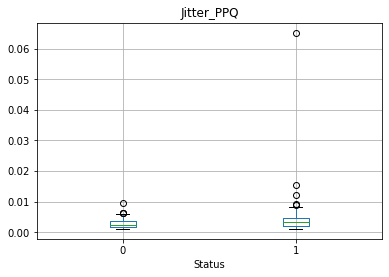

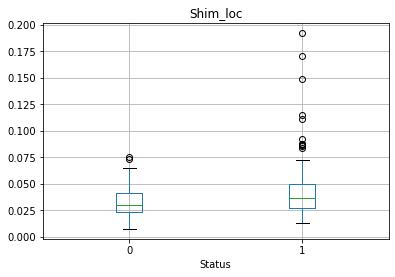

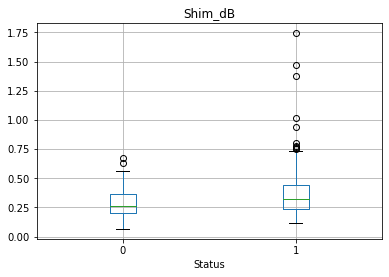

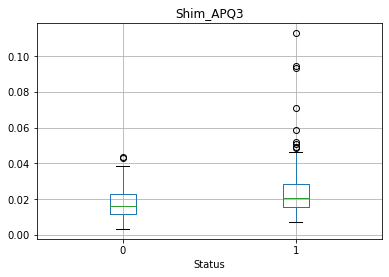

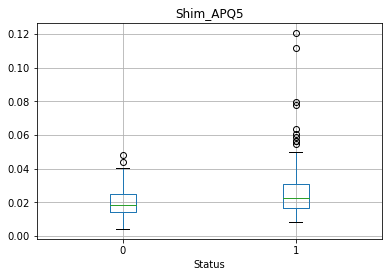

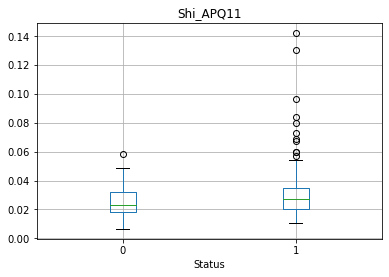

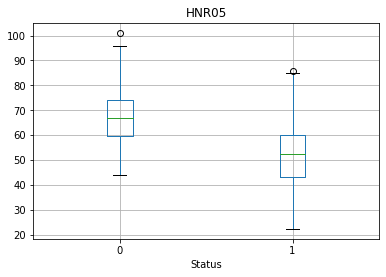

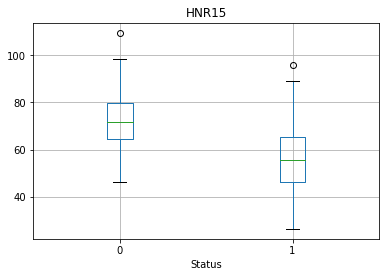

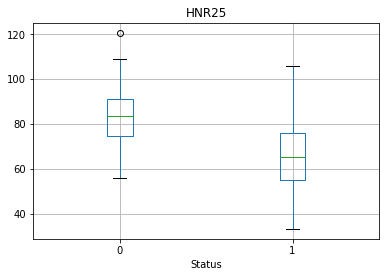

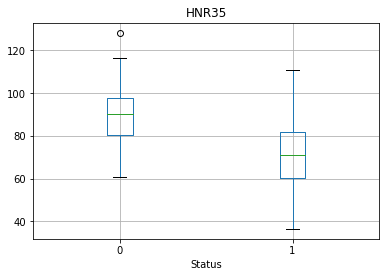

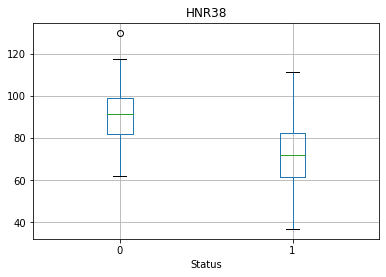

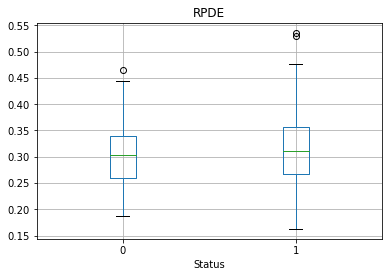

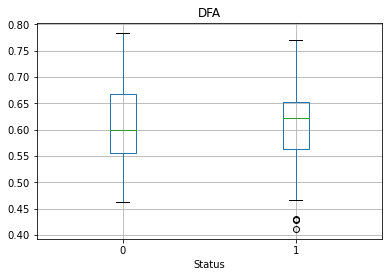

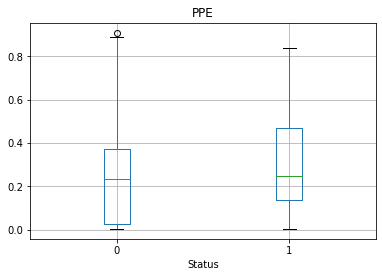

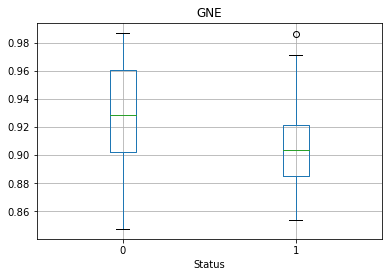

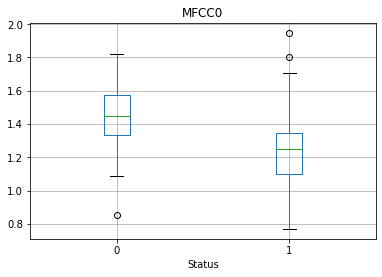

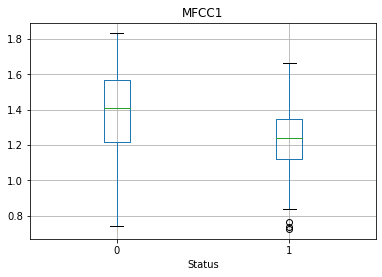

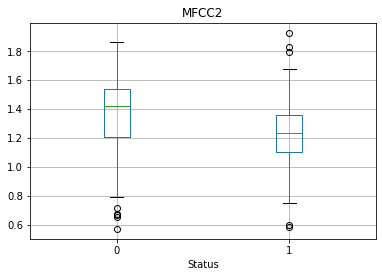

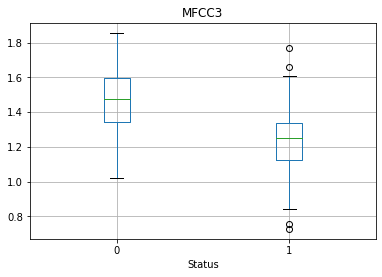

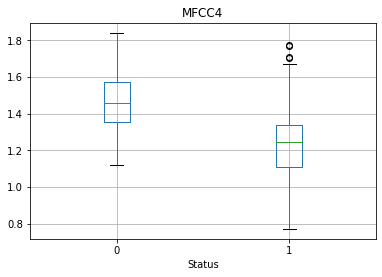

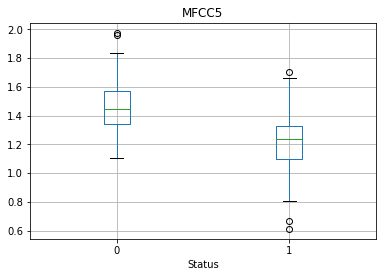

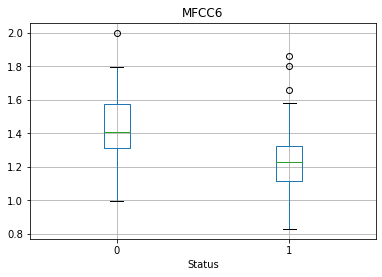

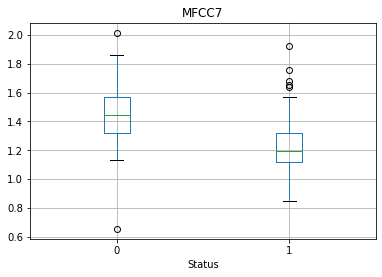

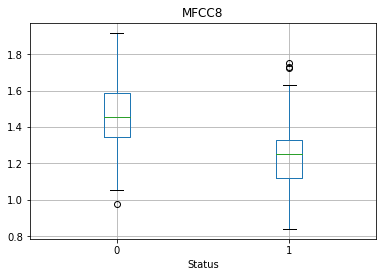

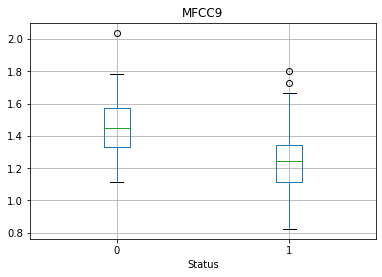

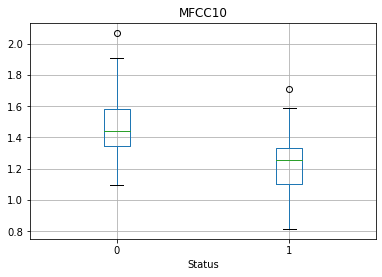

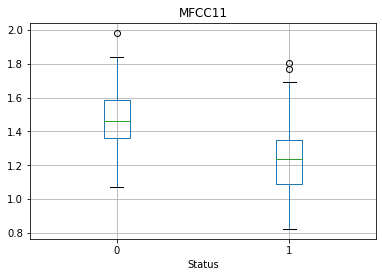

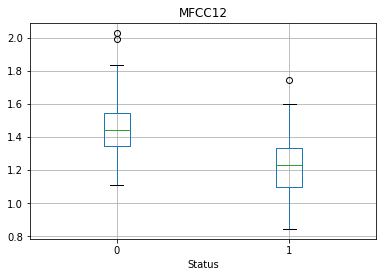

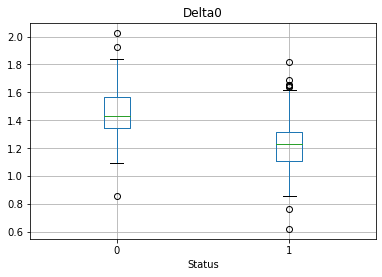

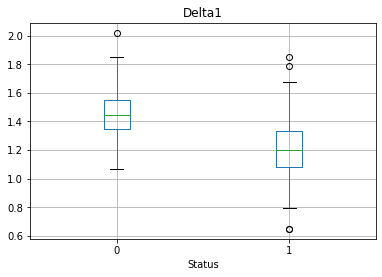

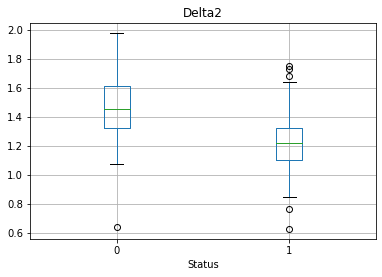

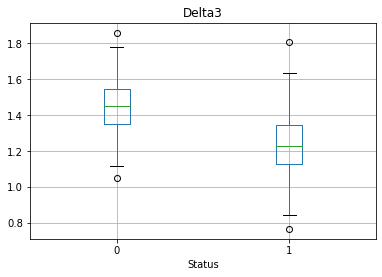

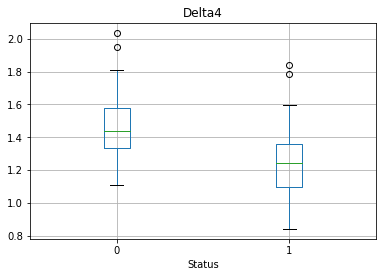

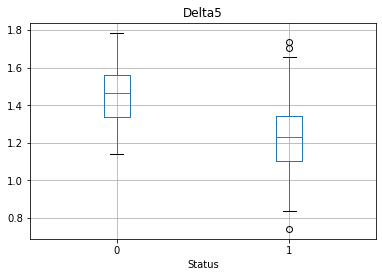

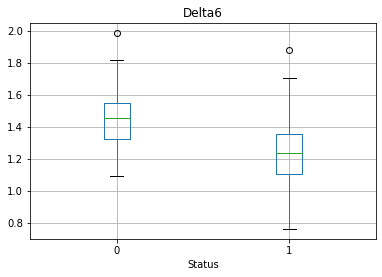

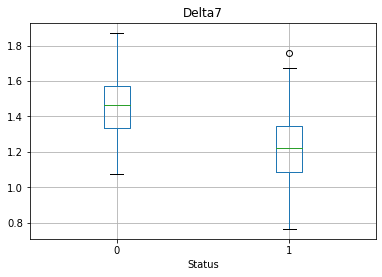

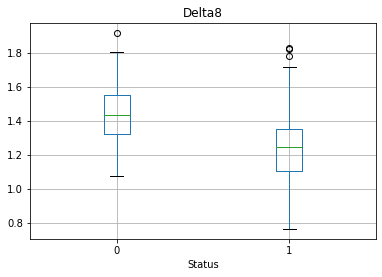

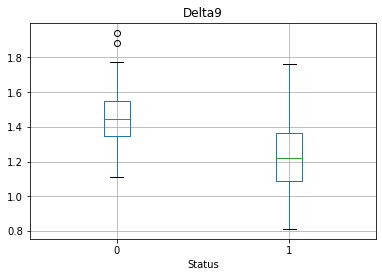

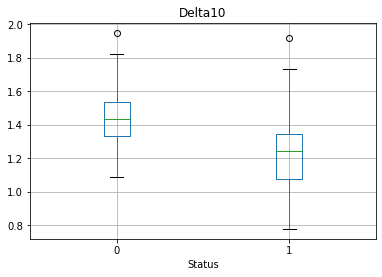

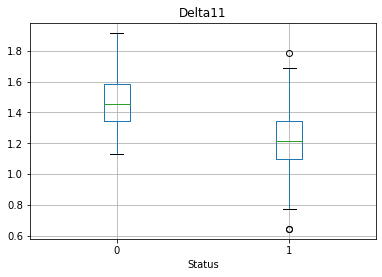

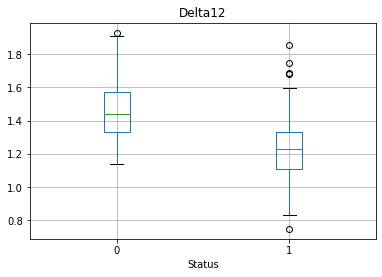

In [56]:
# Visualize the relationship between class label and each feature
numerical_features = ["Jitter_rel", "Jitter_abs", "Jitter_RAP", "Jitter_PPQ",
                      "Shim_loc", "Shim_dB", "Shim_APQ3", "Shim_APQ5", "Shi_APQ11", 
                      "HNR05", "HNR15", "HNR25", "HNR35", "HNR38", "RPDE", "DFA", 
                      "PPE", "GNE", "MFCC0", "MFCC1", "MFCC2", "MFCC3", "MFCC4", 
                      "MFCC5", "MFCC6", "MFCC7", "MFCC8", "MFCC9", "MFCC10", 
                      "MFCC11", "MFCC12", "Delta0", "Delta1", "Delta2", "Delta3", 
                      "Delta4", "Delta5", "Delta6", "Delta7", "Delta8", "Delta9", 
                      "Delta10", "Delta11", "Delta12"]

for feature in numerical_features:
    parkinson_data.boxplot(column = feature, by = "Status")  
    plt.suptitle("") # Remove subtitle

In [57]:
# Split data into training (90%) and testing (10%) sets
y = parkinson_data["Status"].values
# Drop columns that are not features
X = parkinson_data.drop(columns = ["ID", "Recording", "Status"]).values
feature_used = parkinson_data.drop(columns = ["ID", "Recording", "Status"]).columns.tolist()
print("The used features are:\n", feature_used)

# Set random_state to keep the same spliting procedure each time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
print("\nThe dimensions of training and testing sets are:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

The used features are:
 ['Gender', 'Jitter_rel', 'Jitter_abs', 'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3', 'Shim_APQ5', 'Shi_APQ11', 'HNR05', 'HNR15', 'HNR25', 'HNR35', 'HNR38', 'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4', 'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11', 'Delta12']

The dimensions of training and testing sets are:
(216, 45) (24, 45) (216,) (24,)


In [58]:
# Perform data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
pca = PCA(n_components = 2)

# Fit the PCA model using the training set
pca.fit(X_train)

PCA(n_components=2)

In [60]:
# Calculated the 2D representation
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

(216, 2) (24, 2)


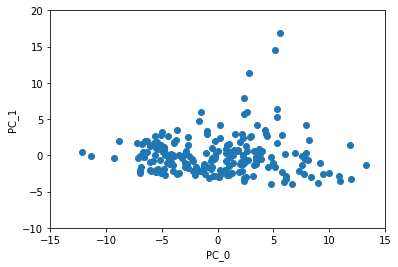

In [61]:
# Visualize the training set in 2D space based on PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1]) 
plt.xlim(-15, 15)
plt.ylim(-10, 20) 
plt.xlabel("PC_0") # First principal component
plt.ylabel("PC_1") # Second principal component
plt.show()

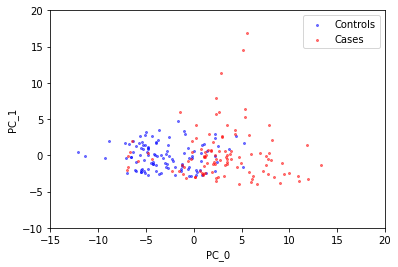

In [62]:
# Visualize the training set with labels, based on PCA
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], # Control: y_train == 0; (1st PC, 2nd PC) in controls
            s = 4, # Set marker size
            c = "blue", # Set color 
            alpha = 0.5, # Set transparency 
            label = "Controls") # Set label
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], # Case: y_train == 1; (1st PC, 2nd PC) in cases
            s = 4, # Set marker size 
            c = "red", # Set color 
            alpha = 0.5, # Set transparency 
            label = "Cases") # Set label
plt.xlim(-15, 20)
plt.ylim(-10, 20) 
plt.xlabel("PC_0")
plt.ylabel("PC_1") 
plt.legend() # Show legend 
plt.show()

### b.	Please visualize the data (with label distribution) in 2D t-SNE space. (10%)

In [63]:
# Import packages
from sklearn.manifold import TSNE

In [64]:
tsne = TSNE(n_components = 2,
            init = "random", # random ininitialization, other option: pca 
            random_state = 1)

In [65]:
# Calculated the 2D representation
X_train_tsne = tsne.fit_transform(X_train)
print(X_train_tsne.shape)

(216, 2)


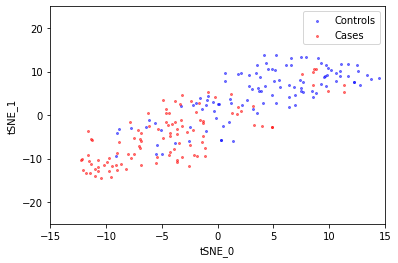

In [66]:
# Visualize the training set with labels, based on t-SNE
plt.scatter(X_train_tsne[y_train == 0, 0], X_train_tsne[y_train == 0, 1], 
            s = 4, # Set marker size
            c = "blue", # Set color 
            alpha = 0.5, # Set transparency 
            label = "Controls") # Set label
plt.scatter(X_train_tsne[y_train == 1, 0], X_train_tsne[y_train == 1, 1],
            s = 4, # Set marker size 
            c = "red", # Set color 
            alpha = 0.5, # Set transparency 
            label = "Cases") # Set label
plt.xlim(-15, 15)
plt.ylim(-25, 25) 
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1") 
plt.legend() # Show legend 
plt.show()

### c.	Features (i.e., components) extracted by PCA can be also used in downstream machine learning modeling, please extract PCA components which can capture at least 80% variance and use them to build random forest model to predict status of each sample . (20%)

In [67]:
# Import packages
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [68]:
pca = PCA(random_state = 1)

# Fit the PCA model using the training set
pca.fit(X_train)

PCA(random_state=1)

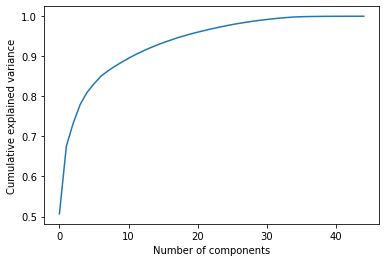

In [69]:
# Plot the cumulative explained variance ratio versus number of components,
# to determine the number of necessary components that capture at least 80% variance of data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [70]:
# Show the number of original features - 45
print(X_train.shape) 

(216, 45)


In [71]:
# As shown in the above plot, when the number of components is 5, the cumulative explained variance ratio is 
# apparently over 80%
# Extract PCA components from the training set
X_train_pca5 = pca.transform(X_train)[:, :5] 

# Extract PCA components from the testing set
X_test_pca5 = pca.transform(X_test)[:, :5]

In [72]:
# Show the number of features in the training and testing sets, respectively
print(X_train_pca5.shape, X_test_pca5.shape)

(216, 5) (24, 5)


In [73]:
# Build a random forest model 
clf = RandomForestClassifier(criterion = "gini",
                             n_estimators = 20,
                             bootstrap = True,
                             max_samples = 0.7, # The number of samples to draw from X to train each base estimator
                             random_state = 1)
clf.fit(X_train_pca5, y_train)

RandomForestClassifier(max_samples=0.7, n_estimators=20, random_state=1)

In [74]:
# Make predictions on the testing set
y_proba = clf.predict_proba(X_test_pca5)[:, 1]

# Create true and false positive rates
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_proba)

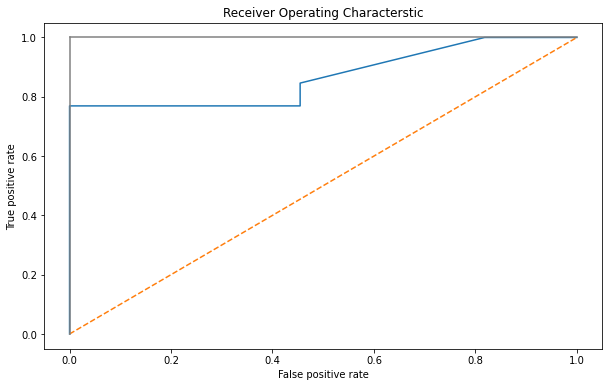

In [75]:
# Plot ROC Curve
plt.figure(figsize = (10, 6)) 
plt.title("Receiver Operating Characterstic") 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0, 1], ls = "--") 
plt.plot([0, 0], [1, 0], c = "0.5") 
plt.plot([1, 1], c = "0.5")
plt.xlabel("False positive rate") 
plt.ylabel("True positive rate")
plt.show()

In [76]:
# Calculate area under the curve
auc_lr = roc_auc_score(y_test, y_proba) 
print(auc_lr)

0.8671328671328672


In [77]:
# Recap the true status of each sample
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1])

In [78]:
# Output the predicted status of each sample
clf.predict(X_test_pca5)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0])

In [79]:
# If we choose the number of components as 7
# Extract PCA components from the training set
X_train_pca7 = pca.transform(X_train)[:, :7] 

# Extract PCA components from the testing set
X_test_pca7 = pca.transform(X_test)[:, :7]

In [80]:
# Show the number of features in the training and testing sets, respectively
print(X_train_pca7.shape, X_test_pca7.shape)

(216, 7) (24, 7)


In [81]:
# Build a random forest model 
clf = RandomForestClassifier(criterion = "gini",
                             n_estimators = 20,
                             bootstrap = True,
                             max_samples = 0.7,
                             random_state = 1)
clf.fit(X_train_pca7, y_train)

RandomForestClassifier(max_samples=0.7, n_estimators=20, random_state=1)

In [82]:
# Make predictions on the testing set
y_proba = clf.predict_proba(X_test_pca7)[:, 1]

# Create true and false positive rates
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_proba)

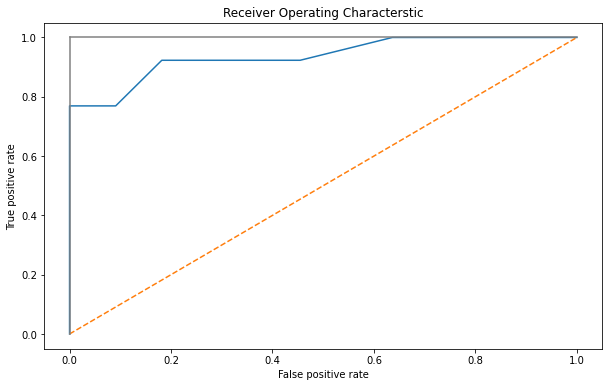

In [83]:
# Plot ROC Curve
plt.figure(figsize = (10, 6)) 
plt.title("Receiver Operating Characterstic") 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0, 1], ls = "--") 
plt.plot([0, 0], [1, 0], c = "0.5") 
plt.plot([1, 1], c = "0.5")
plt.xlabel("False positive rate") 
plt.ylabel("True positive rate")
plt.show()

In [84]:
# Calculate area under the curve
auc_lr = roc_auc_score(y_test, y_proba) 
print(auc_lr)

0.9370629370629371


In [85]:
# Recap the true status of each sample
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1])

In [86]:
# Output the predicted status of each sample
clf.predict(X_test_pca7)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0])

### d.	Now we want to identify sub-groups of Parkinson's Disease (PD) subjects (all subjects whose status=1), Please extract PCA components which can capture at least 80% variance of these PD subjects and use them to build Kmeans clustering model to identify PD sub-groups. (10%)

In [87]:
# Extract data of subjects whose status = 1
total_data = pd.read_csv("Parkinson.csv", delimiter = ",", header = 0)
patient_data = total_data.loc[total_data["Status"] == 1]
patient_data

ID  Recording  Status  Gender  Jitter_rel  Jitter_abs  Jitter_RAP  \
120  PARK-01          1       1       0     0.57147    0.000043    0.003232   
121  PARK-01          2       1       0     1.87690    0.000134    0.012359   
122  PARK-01          3       1       0     0.77871    0.000057    0.004686   
123  PARK-02          1       1       0     0.28064    0.000016    0.001350   
124  PARK-02          2       1       0     0.37915    0.000021    0.002022   
..       ...        ...     ...     ...         ...         ...         ...   
235  PARK-39          2       1       0     0.57585    0.000037    0.003701   
236  PARK-39          3       1       0     0.23322    0.000015    0.001270   
237  PARK-40          1       1       0     0.26862    0.000022    0.001354   
238  PARK-40          2       1       0     0.45376    0.000037    0.002724   
239  PARK-40          3       1       0     0.34706    0.000028    0.001746   

     Jitter_PPQ  Shim_loc  Shim_dB  ...    Delta3    Delta4    Delta5  \
120    0.003447  0.040432  0.35130  ...  1.292551  1.274699  1.226104   
121    0.007862  0.072519  0.63059  ...  1.266738  1.159582  1.219404   
122    0.004593  0.025057  0.21909  ...  1.591111  1.459256  1.430586   
123    0.001666  0.026001  0.23637  ...  1.810596  1.539828  1.403535   
124    0.002299  0.035295  0.30841  ...  1.430767  1.436301  1.399475   
..          ...       ...      ...  ...       ...       ...       ...   
235    0.005149  0.016868  0.14928  ...  1.116409  1.104511  1.099866   
236    0.001497  0.017923  0.16720  ...  1.107477  1.083859  1.101819   
237    0.001615  0.028040  0.24182  ...  1.335189  1.385580  1.281551   
238    0.002258  0.064605  0.58002  ...  1.327629  1.349928  1.461323   
239    0.002060  0.019914  0.17087  ...  1.440003  1.327946  1.531764   

       Delta6    Delta7    Delta8    Delta9   Delta10   Delta11   Delta12  
120  1.294742  1.250054  1.336242  1.165684  1.324372  1.401282  1.340146  
121  1.209458  1.188779  1.293522  1.135879  1.182994  1.339016  1.223774  
122  1.536976  1.342772  1.432163  1.496584  1.417815  1.506083  1.392193  
123  1.432014  1.585843  1.477884  1.475199  1.603818  1.784905  1.408777  
124  1.358467  1.754986  1.616885  1.759961  1.347862  1.357279  1.597160  
..        ...       ...       ...       ...       ...       ...       ...  
235  1.080320  1.154057  1.117423  1.167076  1.132436  1.107824  1.109144  
236  1.114161  1.090095  1.140705  1.126667  1.158444  1.096073  1.141835  
237  1.367171  1.319055  1.367095  1.343193  1.374330  1.383364  1.456409  
238  1.350599  1.346363  1.415338  1.361937  1.331923  1.423062  1.307353  
239  1.471198  1.445675  1.415942  1.304214  1.395653  1.315691  1.422534  

[120 rows x 48 columns]

In [88]:
# Extract features without labels
X = patient_data.drop(columns = ["ID", "Recording", "Status"]) 
X.shape

(120, 45)

In [89]:
# Perform data scaling
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-0.73379939, -0.16496548, -0.11173337, ...,  0.51952407,
         0.93609698,  0.58617831],
       [-0.73379939,  1.71882747,  1.50582452, ..., -0.19428546,
         0.61398747, -0.06245509],
       [-0.73379939,  0.13409096,  0.14544392, ...,  0.99130829,
         1.47824037,  0.87627683],
       ...,
       [-0.73379939, -0.60199137, -0.47092688, ...,  0.77175991,
         0.84340591,  1.23420196],
       [-0.73379939, -0.3348262 , -0.21645784, ...,  0.55764685,
         1.04876492,  0.4033943 ],
       [-0.73379939, -0.48879899, -0.36361727, ...,  0.87941492,
         0.49333054,  1.04538944]])

In [90]:
pca = PCA(random_state = 1)

# Fit the PCA model using the scaled feature set
pca.fit(X_scaled)

PCA(random_state=1)

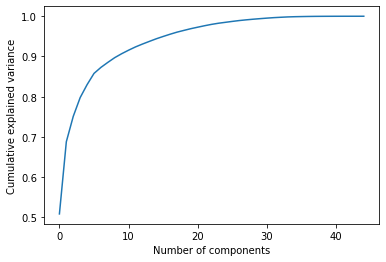

In [91]:
# Plot the cumulative explained variance ratio versus number of components,
# to determine the number of necessary components that capture at least 80% variance of data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [92]:
print(X_scaled.shape) # Show the number of original features - 45

(120, 45)


In [93]:
# As shown in the above plot, when the number of components is 5, the cumulative explained variance ratio is 
# over 80%
# Extract PCA components from the scaled feature set
X_scaled_pca5 = pca.transform(X_scaled)[:, :5] 
X_scaled_pca5

array([[-1.94508906e+00, -8.80081975e-02, -9.12702047e-01,
         1.34306986e-01, -1.13026854e+00],
       [-9.06746276e-02,  3.58789710e+00,  2.53407491e-02,
         1.10404934e+00, -4.13235829e-01],
       [-6.36897545e+00, -6.19635418e-01,  7.55576040e-01,
         1.02262864e+00, -1.96538509e+00],
       [-9.64100067e+00, -1.59877676e+00, -6.51179664e-01,
         2.93172916e-01,  1.97428123e+00],
       [-8.19671939e+00, -1.20692754e+00,  5.92394892e-01,
        -1.08189902e-01,  8.17972959e-01],
       [-1.10829891e+01, -1.15453007e+00,  1.86360737e+00,
        -6.07720820e-01,  6.84917960e-01],
       [-6.16231783e+00,  4.64800901e+00,  1.83587047e+00,
        -3.63874648e+00,  6.47218338e-01],
       [-2.02802999e+00,  9.69372974e+00,  6.83678330e-01,
        -5.06439545e+00,  1.93880039e+00],
       [-3.69964369e+00,  3.29621117e+00, -1.34116854e-01,
        -1.69162408e+00,  7.56748370e-01],
       [-1.08494146e+01, -2.84047315e+00,  1.61067657e+00,
         5.43539985e-01

In [94]:
# Show the number of features in the new scaled feature sets using PCA
print(X_scaled_pca5.shape)

(120, 5)


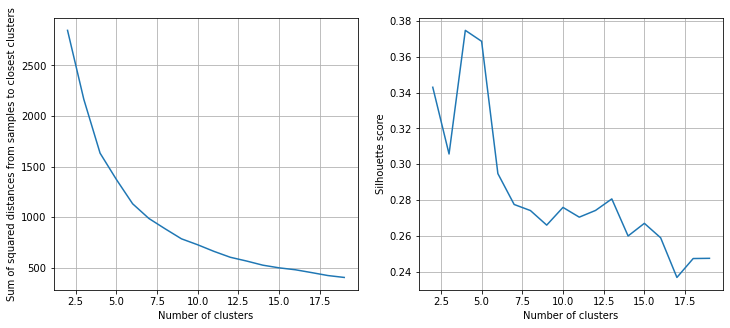

In [95]:
# Build a K-means clustering model using features derived from PCA
# Perform clustering with the optimal cluster number
K = 20
squared_distance = [] 
silhouette_score = []
for i in range(2, K): 
    kmean = KMeans(i, random_state = 1)
    kmean.fit(X_scaled_pca5) # Use PCA derived components
    squared_distance.append(kmean.inertia_)
    silhouette_score.append(metrics.silhouette_score(X_scaled_pca5, # Use PCA derived components
                                                     kmean.labels_, 
                                                     metric = "euclidean"))
fig, axs = plt.subplots(1, 2, figsize = (12, 5)) 
axs[0].plot(range(2, K), squared_distance) 
axs[1].plot(range(2, K), silhouette_score)
axs[0].grid(True) # Turn the axes grids on
axs[0].set_ylabel("Sum of squared distances from samples to closest clusters") 
axs[0].set_xlabel("Number of clusters")
axs[1].grid(True) # Turn the axes grids on 
axs[1].set_ylabel("Silhouette score") 
axs[1].set_xlabel("Number of clusters")
plt.show()

In [96]:
# Output the sum of squared distances from samples to closest clusters
squared_distance

[2846.124105330307,
 2164.6366402731574,
 1632.398115372879,
 1372.8876221285045,
 1132.284560012016,
 986.9499097434503,
 884.6913802553371,
 786.07449627675,
 727.0513709186532,
 661.8210888242527,
 603.7647236362056,
 566.6342691058388,
 525.5950735375678,
 499.23099563319215,
 480.2974315858497,
 452.2304462795151,
 423.11468494679065,
 404.415129483563]

In [97]:
# Output the Silhouette score
silhouette_score

[0.34293646434523206,
 0.3056795551953036,
 0.3746956087537225,
 0.3685894411126192,
 0.2947402206504146,
 0.2775014767054137,
 0.2741100349668958,
 0.26598131773567996,
 0.2758672595093419,
 0.2704250983661402,
 0.2741726421123533,
 0.28060664912965444,
 0.25991611258331754,
 0.2669720091023333,
 0.2589220023059063,
 0.23676955434067934,
 0.2473245048662049,
 0.24744248980603334]

In [98]:
# Considering the sum of squared distances and Silhouette score, we determine the cluster number as 4
# Produce cluster labels
labels = KMeans(4, random_state = 1).fit(X_scaled_pca5).labels_
labels

array([3, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 0, 3, 0, 0, 0, 3, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1, 1, 1, 3, 3,
       0, 3, 1, 1, 1, 1, 1, 3, 3, 3], dtype=int32)

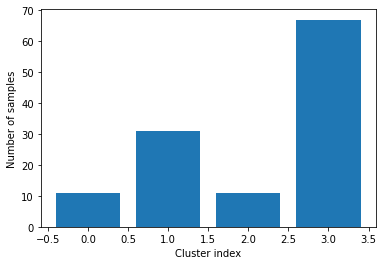

In [99]:
# Evaluate clusters
# Visualize cluster size distribution
unique_labels, lanel_cnts = np.unique(labels, return_counts = True) 
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("Number of samples")
plt.show()

In [100]:
tsne = TSNE(n_components = 2,
            init = "random", # Random initialization
            random_state = 1)
X_tsne = tsne.fit_transform(X_scaled_pca5) # Use PCA derived components
X_tsne

array([[  0.53674483,  -1.6111176 ],
       [ -2.3051965 ,  -6.624885  ],
       [  2.7747116 ,   1.409299  ],
       [  3.8356323 ,   3.1262128 ],
       [  3.6912122 ,   2.6799514 ],
       [  4.5106354 ,   3.2635193 ],
       [  1.2672311 ,   2.9202454 ],
       [  4.6546593 ,  -0.5172167 ],
       [  0.6951792 ,   2.25311   ],
       [  4.53135   ,   2.9550161 ],
       [  3.6564085 ,   2.9401422 ],
       [  4.7619724 ,   3.0110877 ],
       [  2.2927122 ,   1.0643939 ],
       [ -1.1427047 ,  -0.06100246],
       [  2.4537005 ,  -4.6814957 ],
       [ -2.3138552 ,  -0.363382  ],
       [ -1.6992776 ,   0.8741679 ],
       [ -1.9727362 ,   0.2980177 ],
       [ -1.6581466 ,   2.2515697 ],
       [ -1.7028662 ,   0.8631254 ],
       [ -1.7450293 ,  -0.5570231 ],
       [  1.3977462 ,   0.5885517 ],
       [ -0.09989917,  -1.4224397 ],
       [ -0.58164114,  -3.1971853 ],
       [  1.0370331 ,  -0.04845732],
       [ -0.29749042,  -0.7770643 ],
       [ -0.06135689,  -4.2671094 ],
 

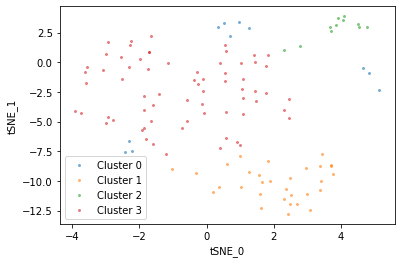

In [101]:
# Visualize the clusters in 2D t-SNE space
for l in unique_labels: # l is "labels"--"l"
    plt.scatter(X_tsne[labels == l, 0],
                X_tsne[labels == l, 1], 
                s = 4, # Marker size
                alpha = 0.5, # Transparency 
                label = "Cluster %s" % l) # Label
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")
plt.legend() # Show legend 
plt.show()

/var/folders/s1/6460_yvs6ggdv14vc1dsk_r40000gn/T/ipykernel_5226/2026361824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_data["Cluster"]  = labels # Create one column "Cluster"
/Users/anniliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


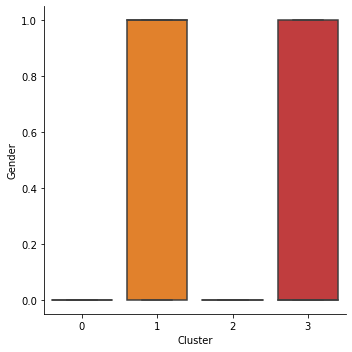

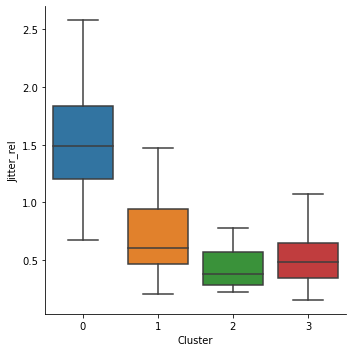

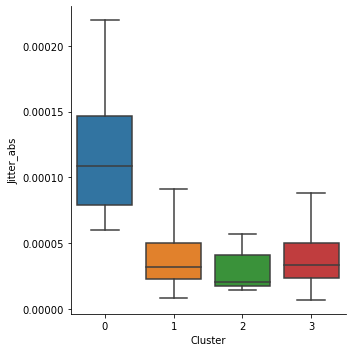

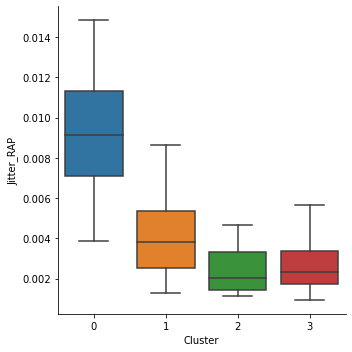

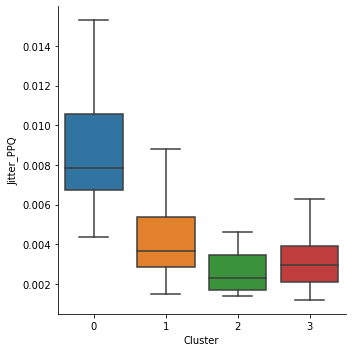

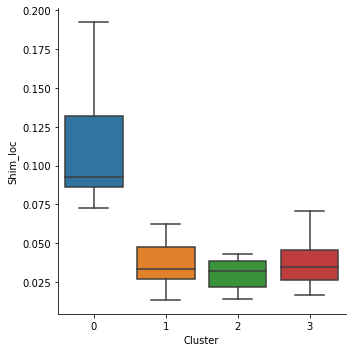

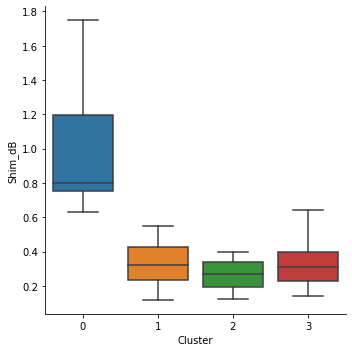

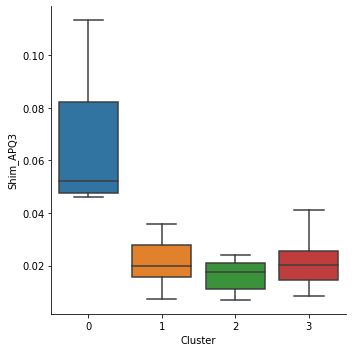

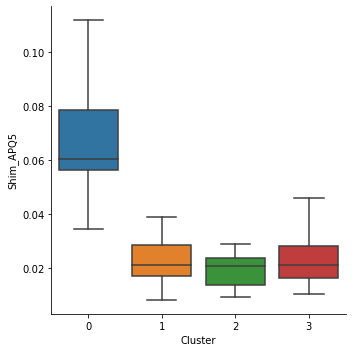

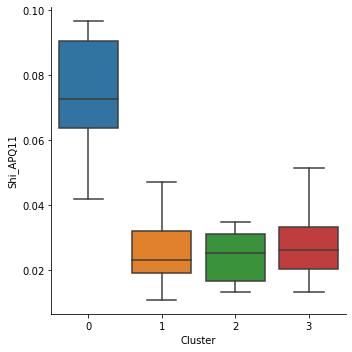

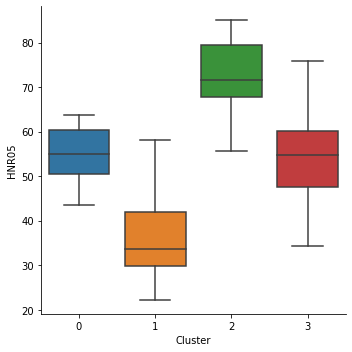

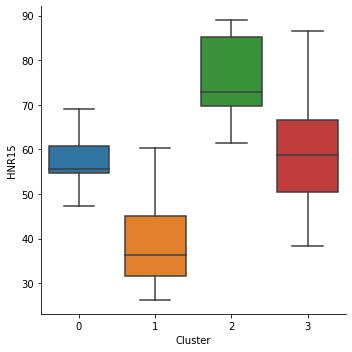

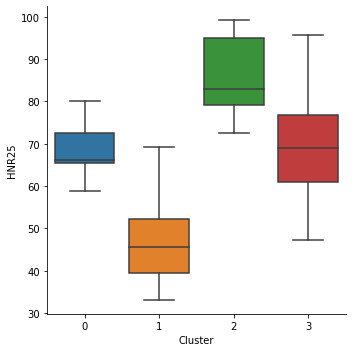

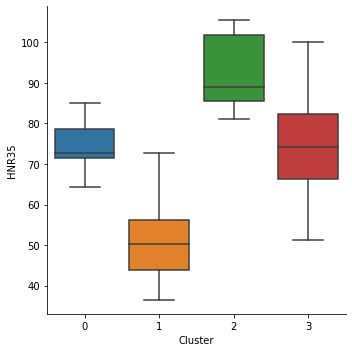

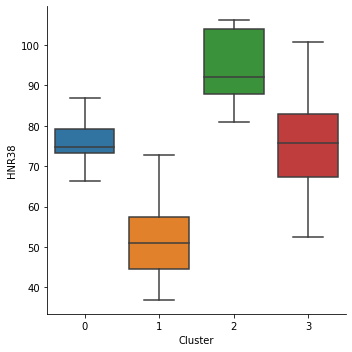

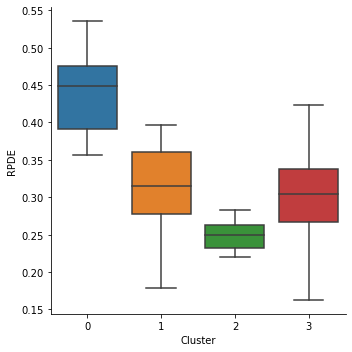

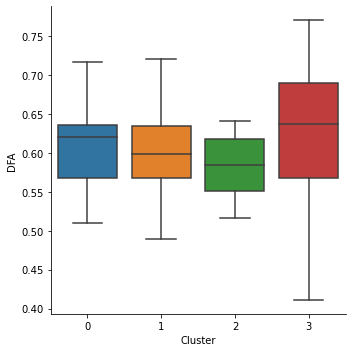

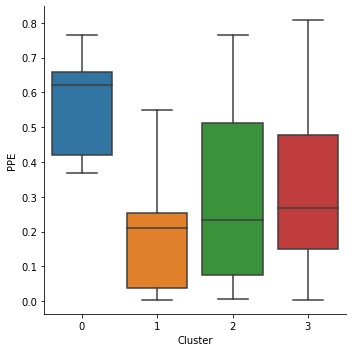

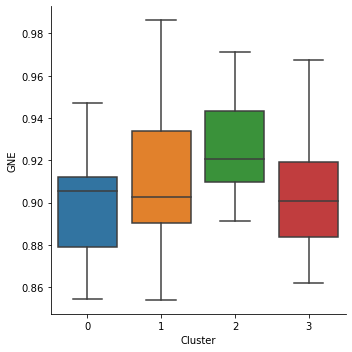

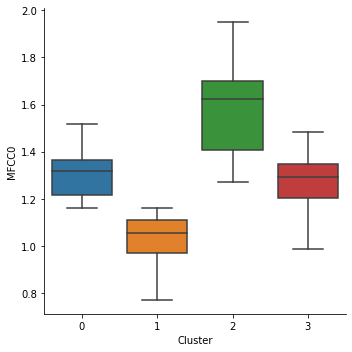

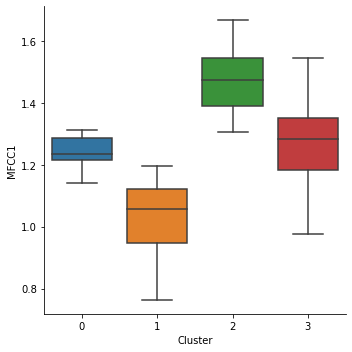

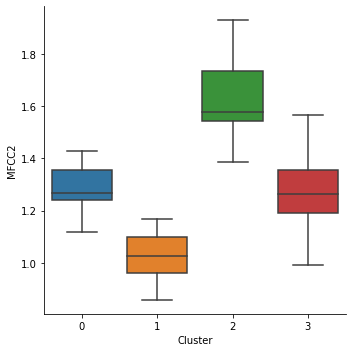

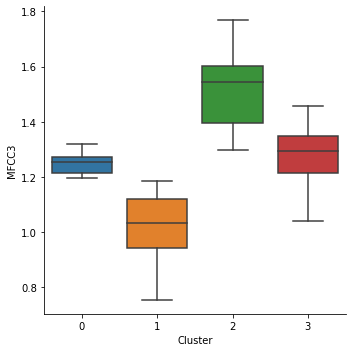

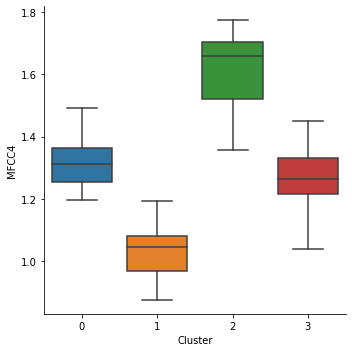

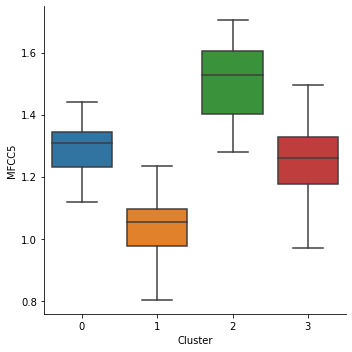

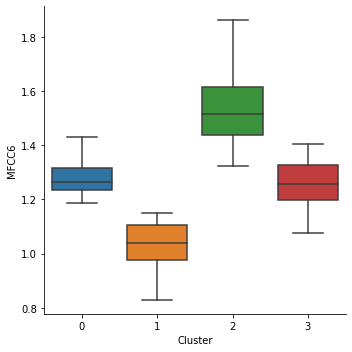

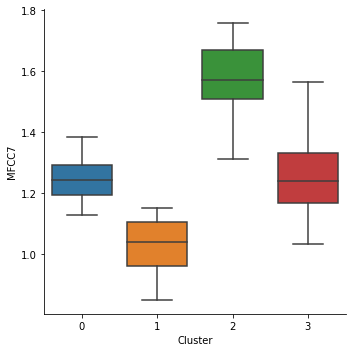

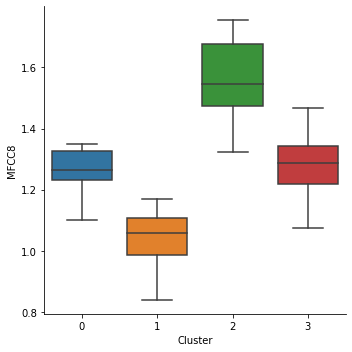

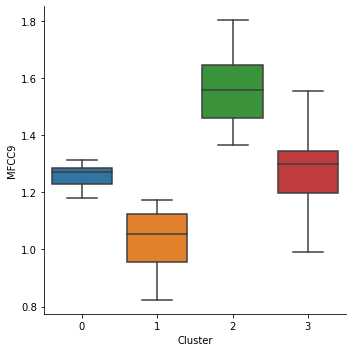

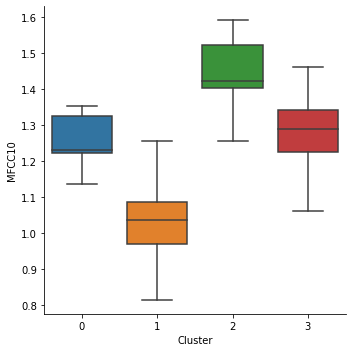

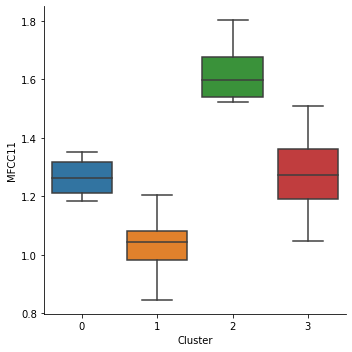

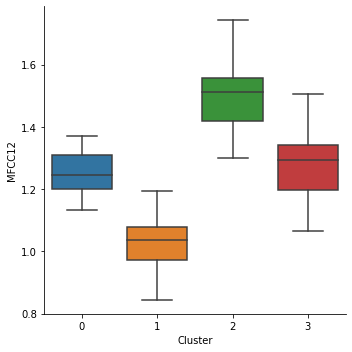

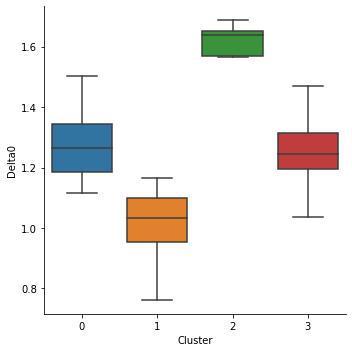

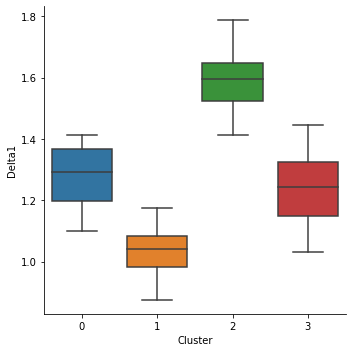

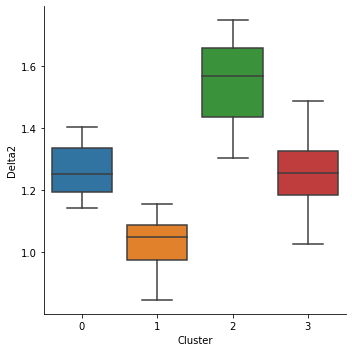

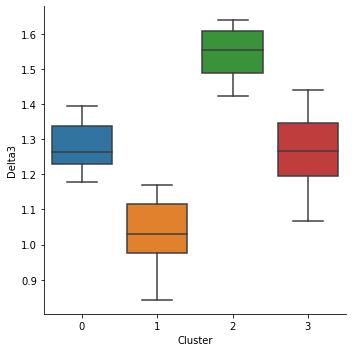

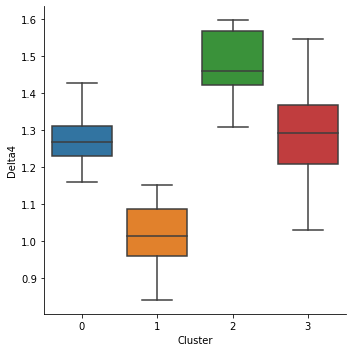

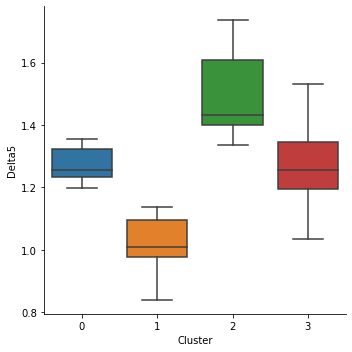

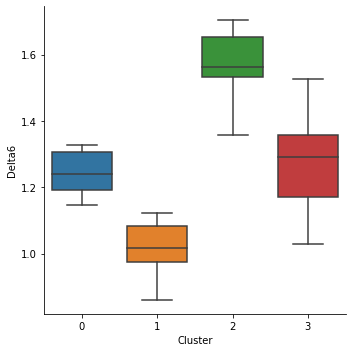

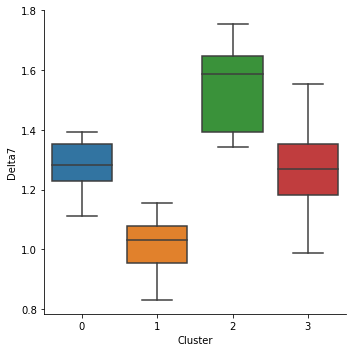

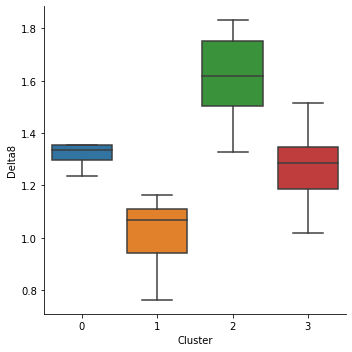

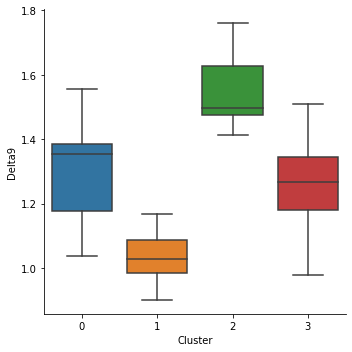

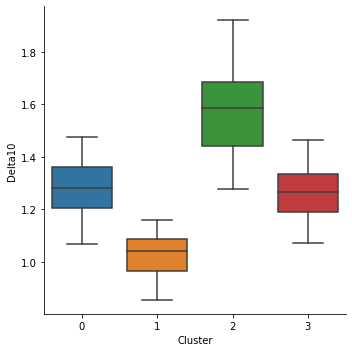

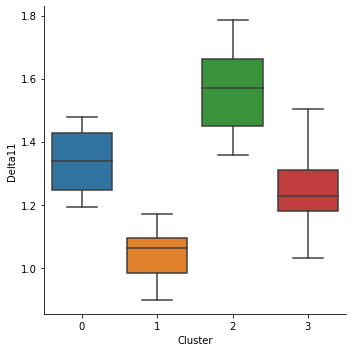

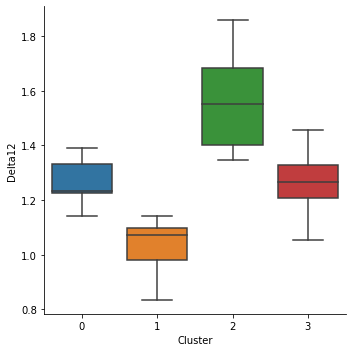

In [102]:
# Use barplot to visualize characteristics of the identified clusters in terms of each feature
# Get feature list
patient_data["Cluster"]  = labels # Create one column "Cluster"
feature_list = patient_data.drop(columns = ["ID", "Recording", "Status", "Cluster"]).columns.tolist()

for var in feature_list:
    sns.catplot(x = "Cluster",
                y = var, 
                kind = "box", 
                showfliers = False, # "showfliers" is used for the outliers
                data = patient_data) 

In [103]:
# Thanks for your time on reviewing my homework!